# Analysis of External Factors that Impact Sales of a Retail Store- A Regression Analysis

## Introduction

### In the highly competitive landscape of the retail industry, understanding the multifaceted dynamics that influence sales performance is essential for strategic decision-making. External factors, ranging from economic indicators and seasonal trends to marketing efforts and competitive influences, play a pivotal role in shaping a retail store's sales trajectory. Through a comprehensive regression analysis, this study aims to delve into the intricate relationships between these external variables and sales outcomes. By quantifying the impact of these factors, retailers can glean actionable insights to optimize operations, tailor marketing strategies, and ultimately enhance their revenue-generation potential.

## Problem statement

### The problem at hand pertains to comprehensively investigating the external factors that have a bearing on the sales performance of retail stores. While existing research acknowledges the significance of various factors such as economic indicators, seasonal trends, and marketing strategies, there remains a gap in terms of a comprehensive and up-to-date analysis that quantifies the individual and collective impacts of these factors. This study aims to bridge this gap by conducting a rigorous regression analysis, thus providing a more nuanced understanding of the interplay between external variables and sales outcomes. The ultimate goal is to offer retailers actionable insights that can drive informed decision-making, optimize resource allocation, and enhance overall sales effectiveness in a competitive retail environment.

## Objective

### The objective of this study is to investigate how external factors such as holiday events, oil prices, public sectors wages and natural occurences, impact the sales of Corporation Favorita, a large Ecuadorian-based grocery retailer.

## Hypothesis

### Null Hypothesis: Promotions have no significant effect on product sales.

### Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.

## Questions

### The questions below are to be answered

### 1. Is the train dataset complete (has all the required dates)?

### 2. Which dates have the lowest and highest sales for each year?

### 3. Did the earthquake impact sales?

### 4. Are certain groups of stores selling more products? (Cluster, city, state, type)

### 5. Are sales affected by promotions, oil prices and holidays?

### 6. What analysis can we get from the date and its extractable features?

### 7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

## Other Questions

### The study seeks to answer the following key questions

### 1.	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
### 2.	What store is the highest performer in terms of sales?
### 3.	What are the best-selling products per location?
### 4.	Does store size affect total sales?
### 5.	Which days have the most sales?

### By answering these questions Retailers, including Corporation Favorita can glean actionable insights to optimize operations, tailor marketing strategies, and ultimately enhance their revenue-generation potential.


### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [1]:
# Installations
#%pip install python-dotenv
#%pip install pyodbc
#%pip install pandas
#%pip install numpy
#%pip install phik
#%pip install arch
#%pip install arch

#### - Import all the necessary packages

In [2]:
#these are the libraries that will be used for the analysis
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from arch.unitroot import ADF
import phik
from phik import resources, report
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import random
from statsmodels.tsa.stattools import kpss
from arch.unitroot import KPSS
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from statsmodels.tsa.api import AutoReg
import pickle
import os
import zipfile

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [3]:
# read the oil dataset
data_oil = pd.read_csv(r"C:/Users/manca/Downloads/dataset/data_oil.csv", parse_dates=["date"])
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [4]:

# check for missing values
data_oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [5]:
# rename column 'dcoilwtico' to oil_price in oil.csv

data_oil.rename(columns={'dcoilwtico':'oil_prices'}, inplace=True)
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


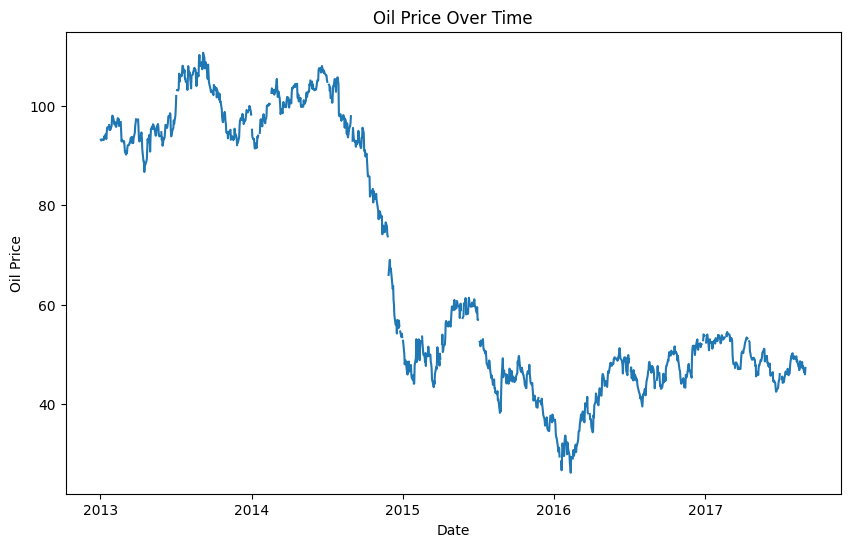

In [6]:
# Assuming your DataFrame is named data_oil
plt.figure(figsize=(10, 6))
plt.plot(data_oil['date'], data_oil['oil_prices'])#marker='o')
plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(False)
plt.show()

In [7]:
# read the holiday dataset
data_holiday = pd.read_csv(r"C:/Users/manca/Downloads/dataset/data_holiday.csv", parse_dates=["date"])
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [8]:
unique_locale_name = data_holiday['locale_name'].unique()
print(unique_locale_name)

['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']


In [9]:
unique_locale = data_holiday['locale'].unique()
print(unique_locale)

['Local' 'Regional' 'National']


In [10]:
unique_description = data_holiday['description'].unique()
print(unique_description)

['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Traslado Independencia de Guayaquil'
 'Dia de Difuntos' 'Independencia de Cuenca'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito-1' 'Fundacion de Quito'
 'Fundacion de Loja' 'Navidad-4' 'Cantonizacion de Salinas' 'Navidad-3'
 'Navidad-2' 'Puente Navidad' 'Navidad-1' 'Navidad' 'Navidad+1'
 'Puente Primer dia del ano' 'Primer 

In [11]:
data_holiday.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [12]:
# read the holiday dataset
data_stores = pd.read_csv(r"C:/Users/manca/Downloads/dataset/data_stores.csv")
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


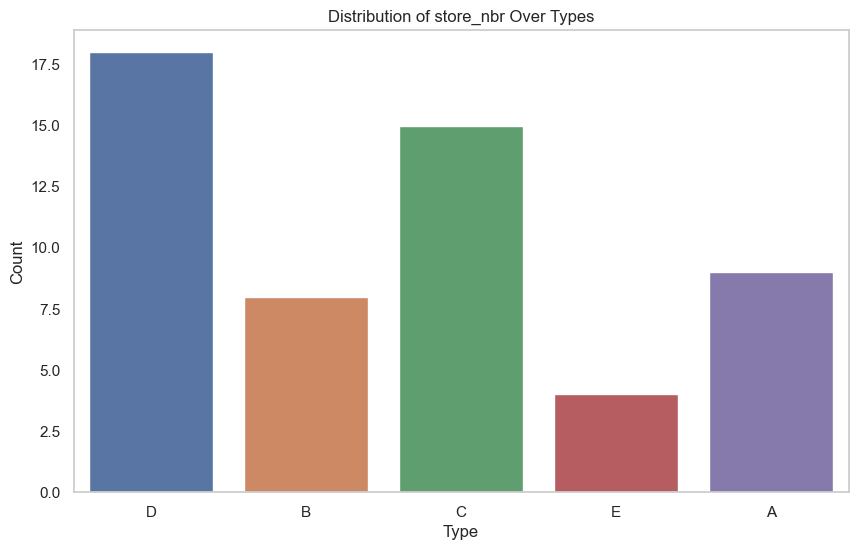

In [13]:
#distribution of store_nbr over types
# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_stores, x='type')
plt.title('Distribution of store_nbr Over Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=360)
plt.show()

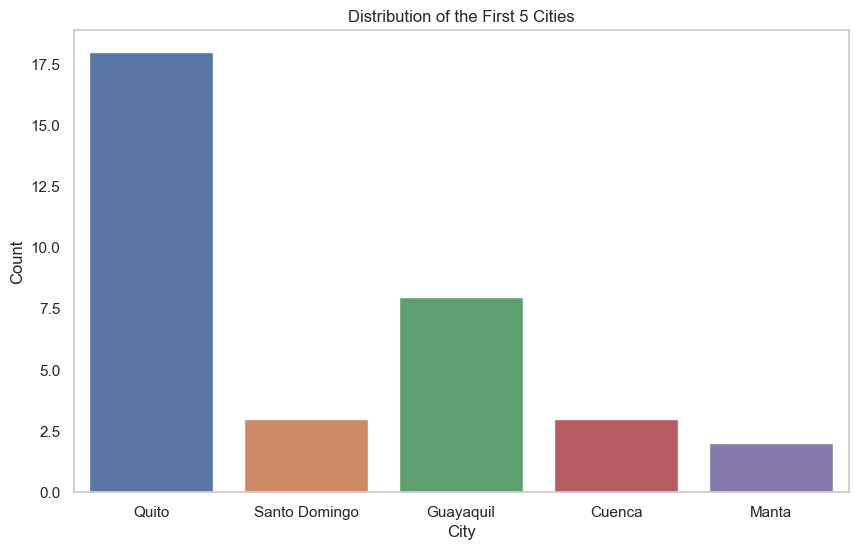

In [14]:
#Distribution of cities and Clusters
# Set the style for the plot
sns.set(style='whitegrid')
# Filter the data for the first 5 cities
first_5_cities = data_stores['city'].value_counts().head(5).index
data_first_5_cities = data_stores[data_stores['city'].isin(first_5_cities)]

# Create a bar plot for the distribution of the first 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=data_first_5_cities, x='city')
plt.title('Distribution of the First 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=360)
plt.show()


In [15]:
# Group the data by cluster and calculate total sales for each cluster
sales_by_cluster = data_stores.groupby('cluster')['store_nbr'].count()

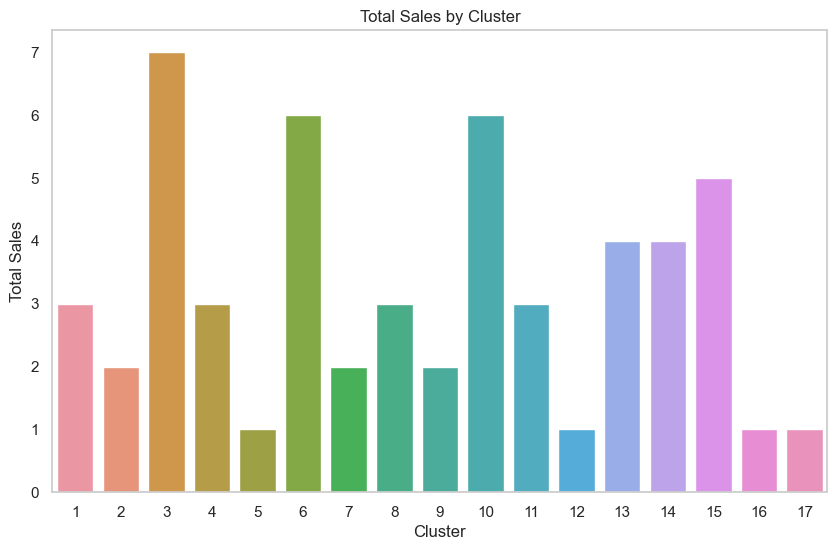

In [16]:
# Create a bar plot for sales by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_cluster.index, y=sales_by_cluster.values)
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.grid(False)
plt.xticks(rotation=0)
plt.show()


In [17]:
data_sub = pd.read_excel("C:/Users/manca/Downloads/dataset/sample_submission (1).xlsx")

In [18]:
data_sub.head(5)

,id,sales
0,3000888,0
1,3000889,0
2,3000890,0
3,3000891,0
4,3000892,0


In [19]:
data_trans = pd.read_csv("C:/Users/manca/Downloads/dataset/transactions.csv", parse_dates=['date'])

In [20]:
data_trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [21]:
data_trans.shape

(83488, 3)

In [22]:
data_test= pd.read_excel("C:/Users/manca/Downloads/dataset/test.xlsx", parse_dates=['date'])

In [23]:
data_train= pd.read_csv("C:/Users/manca/Downloads/dataset/train.csv", parse_dates=['date'])

In [24]:
data_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## Exploratory Data Analysis
### Here we examine the datasets in depth to gain insights, understand patterns, and identify anomalies within the time-ordered datasets.

### checking ranges of dates


In [25]:
# check range of dates for oil.csv

data_oil['date'].min(), data_oil['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [26]:
# check range of dates for holidays_events.csv
data_holiday['date'].min(), data_holiday['date'].max()

(Timestamp('2012-03-02 00:00:00'), Timestamp('2017-12-26 00:00:00'))

In [27]:
# check range of dates for transactions.csv
data_trans['date'].min(), data_trans['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [28]:
# check range of dates for test.csv

data_test['date'].min(), data_test['date'].max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

In [29]:
# check range of dates for train.csv

data_train['date'].min(), data_train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

### From the date ranges the range of the test dataset is 15 days after the train dataset. however, we can see that the transaction dataset ranges within the train range.

In [30]:
# Define a date range that should be complete
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2017-08-15")

# Create a reference date range
reference_dates = pd.date_range(start=start_date, end=end_date, freq="D")

# Find missing dates in the data_train dataset
missing_dates = reference_dates[~reference_dates.isin(data_train["date"])]

if len(missing_dates) == 0:
    print("The data_train dataset is complete.")
else:
    print("Missing dates in the data_train dataset:", missing_dates)



Missing dates in the data_train dataset: DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [31]:
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

In [32]:
# checking recorded number of days
data_train['date'].nunique()

1684

In [33]:
# check date difference
date_difference= data_train['date'].max()-data_train['date'].min()
date_difference

Timedelta('1687 days 00:00:00')

In [34]:
# Expected number of days
date_difference.days + 1 # to replace the 0 index

1688

In [35]:
# create a new dataframe with missing dates
missing_df= list(missing_dates)
print(pd.DataFrame(missing_df))

           0
0 2013-12-25
1 2014-12-25
2 2015-12-25
3 2016-12-25


In [36]:
# add the date column
new_dates= pd.DataFrame(missing_df, columns= ['date'])
new_dates

,date
0,2013-12-25
1,2014-12-25
2,2015-12-25
3,2016-12-25


In [37]:
data_train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [38]:
# concat the new dates to train
train= pd.concat([data_train, new_dates], ignore_index= False). sort_values(by= 'date')
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1194,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0
1193,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0
1192,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0
1191,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0


In [39]:
# confirm if the dates are complete
train['date'].nunique()

1688

In [40]:
# checking null value
train.isnull().sum()

id             4
date           0
store_nbr      4
family         4
sales          4
onpromotion    4
dtype: int64

In [41]:
# impute sales and onpromotion with zero as we make an assumption that sales were not made on those days
sales_imputer= SimpleImputer(strategy= 'constant', fill_value=0)

# The '.values.reshape(-1, 1)' reshapes the data to have a single feature (column)
train['sales']= sales_imputer.fit_transform(train['sales'].values.reshape(-1,1))[:,0]
train['onpromotion']= sales_imputer.fit_transform(train['onpromotion'].values.reshape(-1,1))[:,0]
# fill id, store_nbr and family with forward fill (use the last available value)
train['id'].fillna(method='ffill', inplace=True)
train['store_nbr'].fillna(method='ffill', inplace=True)
train['family'].fillna(method='ffill', inplace=True)

In [42]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [43]:
# Group the data by year and find the date with the lowest sales
lowest_sales_date = train.loc[train.groupby(train['date'].dt.year)['sales'].idxmin()]

# Group the data by year and find the date with the highest sales
highest_sales_date = train.loc[train.groupby(train['date'].dt.year)['sales'].idxmax()]

# Display results
print("Dates with lowest sales in each year:")
print(lowest_sales_date[['date','sales']])

print("Dates with highest sales in each year:")
print(highest_sales_date[['date','sales']])

Dates with lowest sales in each year:
              date  sales
0       2013-01-01    0.0
0       2013-12-25    0.0
649832  2014-01-01    0.0
1298484 2015-01-01    0.0
1947132 2016-01-01    0.0
2597563 2017-01-01    0.0
Dates with highest sales in each year:
              date       sales
562596  2013-11-12   46271.000
1257246 2014-12-08   45361.000
1916586 2015-12-14   40351.460
2163723 2016-05-02  124717.000
2760297 2017-04-02   38422.625


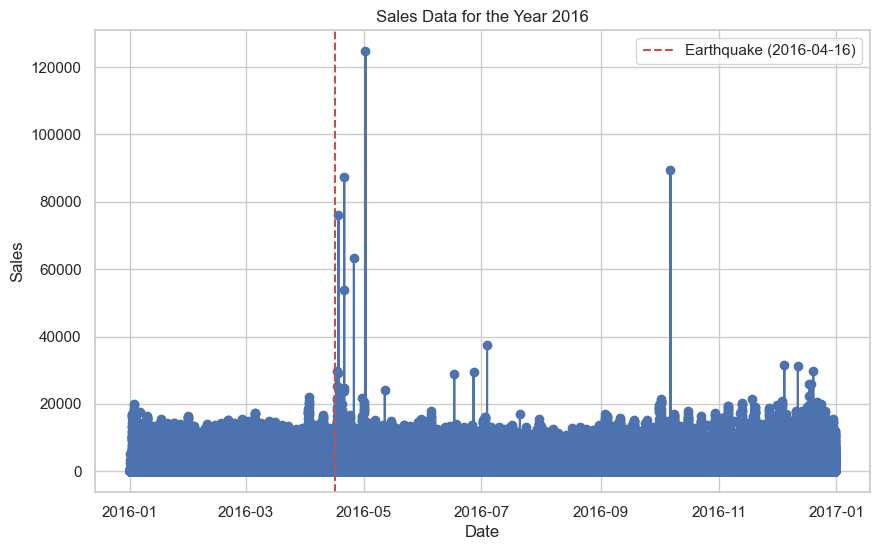

In [44]:
# Filter data for the year 2016
sales_2016 = train[train["date"].dt.year == 2016]

# Plotting the sales data for 2016 using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sales_2016["date"], sales_2016["sales"], marker='o')
plt.axvline(pd.to_datetime("2016-04-16"), color='r', linestyle='--', label="Earthquake (2016-04-16)")
plt.title("Sales Data for the Year 2016")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

In [45]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1194,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0
1193,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0
1192,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0
1191,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0


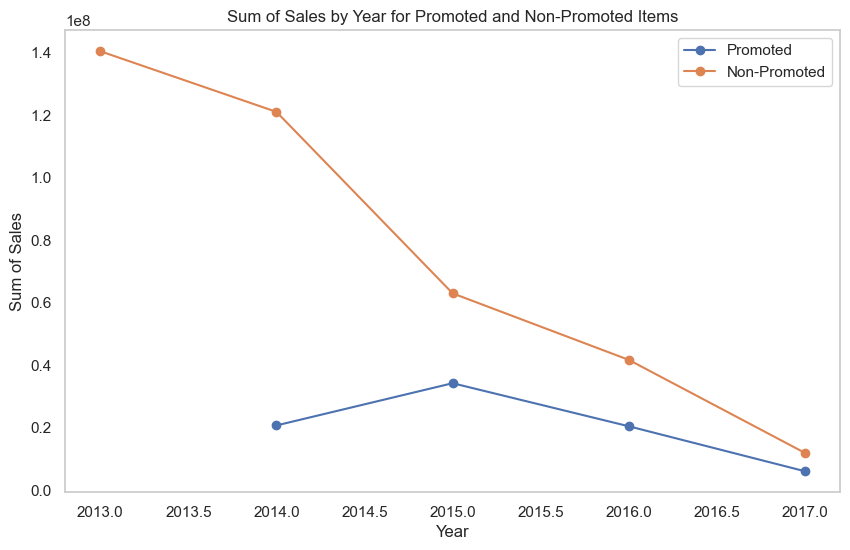

In [46]:
# Filter data for promoted and non-promoted items
promoted_items = train[train['onpromotion'] == 1]
non_promoted_items = train[train['onpromotion'] == 0]

# Group data by year and onpromotion, and calculate the sum of sales
promoted_sales_by_year = promoted_items.groupby([promoted_items["date"].dt.year, "onpromotion"])["sales"].sum().reset_index()
non_promoted_sales_by_year = non_promoted_items.groupby([non_promoted_items["date"].dt.year, "onpromotion"])["sales"].sum().reset_index()

# Plotting the sum of sales for promoted and non-promoted items by year using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(promoted_sales_by_year[promoted_sales_by_year["onpromotion"] == 1]["date"],
         promoted_sales_by_year[promoted_sales_by_year["onpromotion"] == 1]["sales"],
         marker='o', label="Promoted")
plt.plot(non_promoted_sales_by_year[non_promoted_sales_by_year["onpromotion"] == 0]["date"],
         non_promoted_sales_by_year[non_promoted_sales_by_year["onpromotion"] == 0]["sales"],
         marker='o', label="Non-Promoted")
plt.title("Sum of Sales by Year for Promoted and Non-Promoted Items")
plt.xlabel("Year")
plt.ylabel("Sum of Sales")
plt.grid(False)
plt.legend()
plt.show()

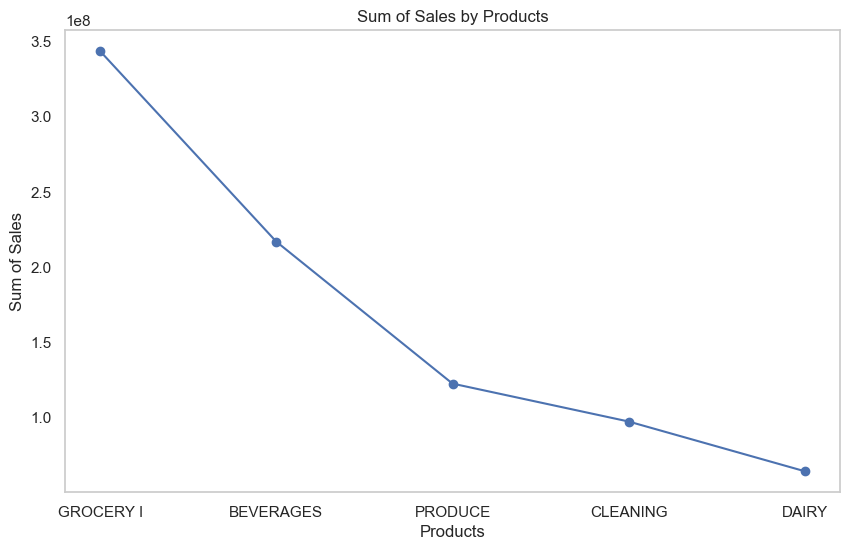

In [47]:
# Group data by products and sales, and calculate the sum of sales
best_selling_products = train.groupby('family')["sales"].sum().reset_index().sort_values(by="sales", ascending=False).head(5)

# Plotting the sum of sales for products
plt.figure(figsize=(10, 6))
plt.plot(best_selling_products['family'], best_selling_products['sales'], marker='o')
plt.title("Sum of Sales by Products")
plt.xlabel("Products")
plt.ylabel("Sum of Sales")
plt.grid(False)
plt.show()

In [48]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1194,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0
1193,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0
1192,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0
1191,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0


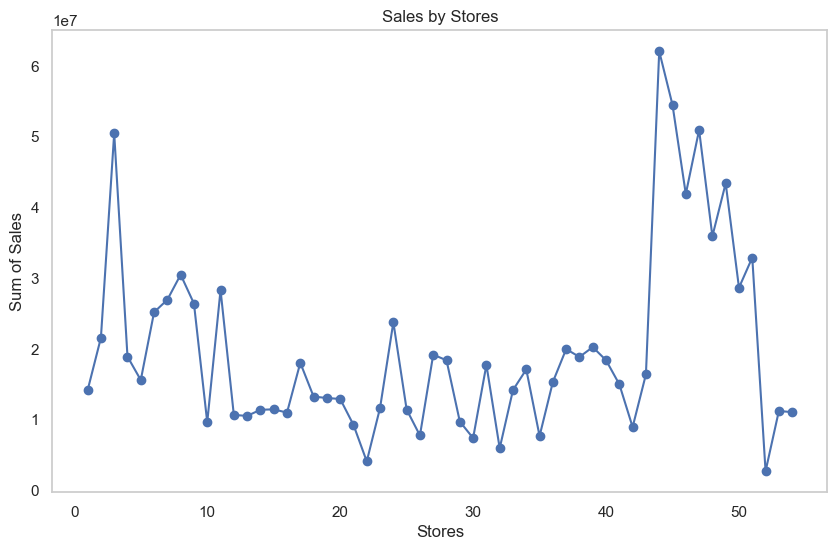

In [49]:
# Group data by stores and sales, and calculate the sum of sales
stores_sales = train.groupby('store_nbr')["sales"].sum().reset_index()

# Plotting the sum of sales for products
plt.figure(figsize=(10, 6))
plt.plot(stores_sales['store_nbr'], stores_sales['sales'], marker='o')
plt.title("Sales by Stores")
plt.xlabel("Stores")
plt.ylabel("Sum of Sales")
plt.grid(False)
plt.show()

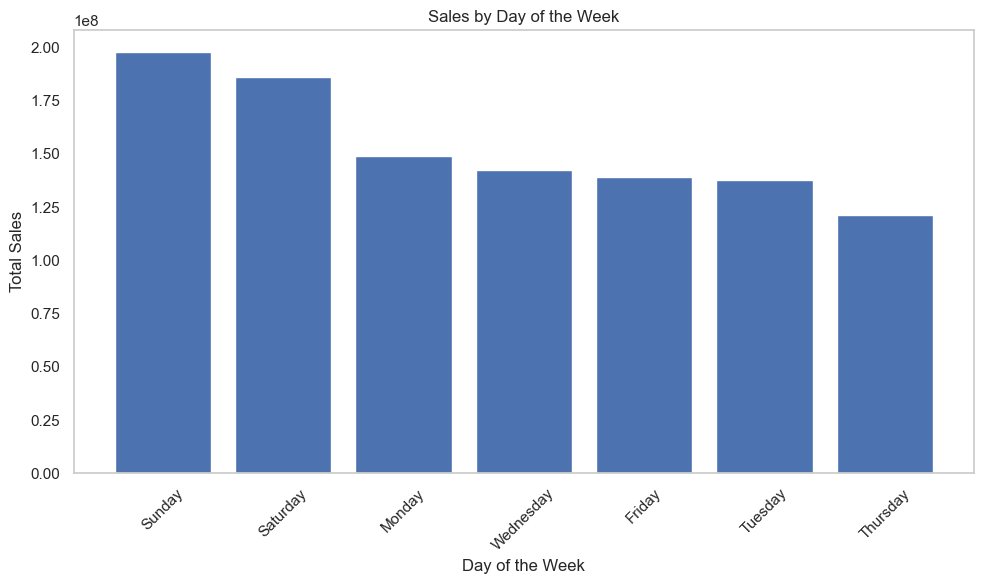

In [50]:
# Group the data by the day of the week and calculate the sum of sales for each day
train["DayOfWeek"] = train["date"].dt.day_name()
weekly_sales = train.groupby("DayOfWeek")["sales"].sum().reset_index().sort_values(by='sales', ascending=False)

# Plotting the sales for each day of the week using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(weekly_sales["DayOfWeek"], weekly_sales["sales"])
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [51]:
data_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


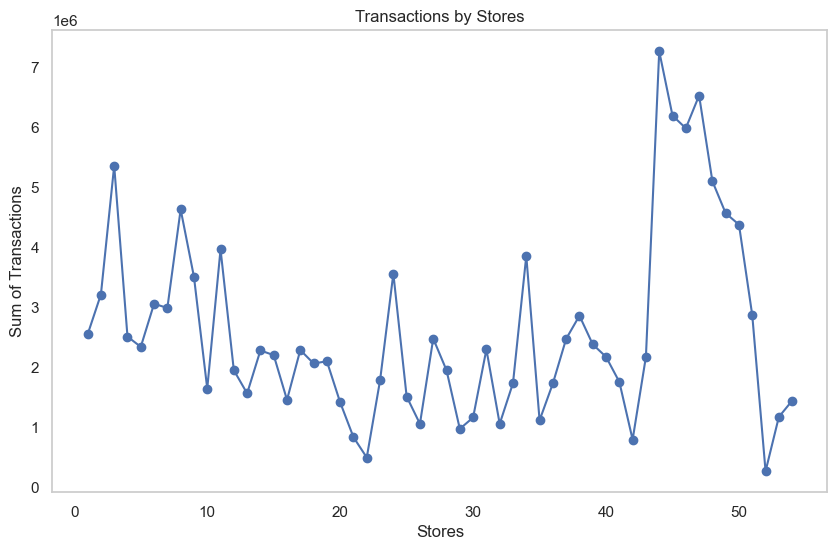

In [52]:
# Group data by stores and transaction, and calculate the sum of data_trans
stores_transaction = data_trans.groupby('store_nbr')["transactions"].sum().reset_index()

# Plotting the sum of transaction for stores
plt.figure(figsize=(10, 6))
plt.plot(stores_transaction['store_nbr'], stores_transaction['transactions'], marker='o')
plt.title("Transactions by Stores")
plt.xlabel("Stores")
plt.ylabel("Sum of Transactions")
plt.grid(False)
plt.show()

In [53]:
data_stores.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [54]:
best_stores_sales = train.groupby('store_nbr')["sales"].sum().reset_index().sort_values(by='sales', ascending=False).head(5)
least_stores_sales = train.groupby('store_nbr')["sales"].sum().reset_index().sort_values(by='sales', ascending=False).tail(5)
print(best_stores_sales)
print(least_stores_sales)

    store_nbr         sales
43       44.0  6.208755e+07
44       45.0  5.449801e+07
46       47.0  5.094831e+07
2         3.0  5.048191e+07
48       49.0  4.342010e+07
    store_nbr         sales
34       35.0  7.676679e+06
29       30.0  7.382074e+06
31       32.0  5.951796e+06
21       22.0  4.090202e+06
51       52.0  2.696170e+06


In [55]:
#check common columns in oil and train datasets
d=data_oil.columns.intersection(train.columns)
d

Index(['date'], dtype='object')

In [56]:
# split oil.csv on the dates that reflects the split for the test and train
#define the start and end dates for the oil.csv that will be joined to the test

oil_test_start_date= '2017-08-16'
oil_test_end_date= '2017-08-31'

oil_train = data_oil[data_oil['date'] < oil_test_start_date]
oil_test = data_oil[data_oil['date'].between (oil_test_start_date, oil_test_end_date)]

# Verify the split
range_oil_test = oil_test['date'].min(), oil_test['date'].max()
range_oil_train = oil_train['date'].min(), oil_train['date'].max()

print(range_oil_test)
print(range_oil_train)

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [57]:
# merge test and oil_test on 'date'

merged_test = pd.merge(data_test, oil_test, on='date', how='left')
print(merged_test.head())

        id       date  store_nbr      family  onpromotion  oil_prices
0  3000888 2017-08-16          1  AUTOMOTIVE            0   46.799999
1  3000889 2017-08-16          1   BABY CARE            0   46.799999
2  3000890 2017-08-16          1      BEAUTY            2   46.799999
3  3000891 2017-08-16          1   BEVERAGES           20   46.799999
4  3000892 2017-08-16          1       BOOKS            0   46.799999


In [58]:
merged_test.shape

(28512, 6)

In [59]:
#check for null or missing values

merged_test.isnull().sum()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
oil_prices     7128
dtype: int64

In [60]:
# merge train and oil_train on 'date'

merged_train = pd.merge(train, oil_train, on='date', how='left')
print(merged_train.head())

       id       date  store_nbr        family  sales  onpromotion DayOfWeek  \
0     0.0 2013-01-01        1.0    AUTOMOTIVE    0.0          0.0   Tuesday   
1  1194.0 2013-01-01       42.0   CELEBRATION    0.0          0.0   Tuesday   
2  1193.0 2013-01-01       42.0  BREAD/BAKERY    0.0          0.0   Tuesday   
3  1192.0 2013-01-01       42.0         BOOKS    0.0          0.0   Tuesday   
4  1191.0 2013-01-01       42.0     BEVERAGES    0.0          0.0   Tuesday   

   oil_prices  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [61]:
merged_train.shape

(3000892, 8)

In [62]:
#check for null or missing values

merged_train.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
DayOfWeek           0
oil_prices     928426
dtype: int64

In [63]:
#check common columns in holiday and train datasets
d=data_holiday.columns.intersection(train.columns)
d

Index(['date'], dtype='object')

In [64]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,DayOfWeek
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Tuesday
1194,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0,Tuesday
1193,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,Tuesday
1192,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0,Tuesday
1191,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0,Tuesday


In [65]:
# split holiday.csv on the dates that reflects the split for the test and train
#define the start and end dates for the holiday.csv that will be joined to the test
holiday_train_start_date= '2013-01-01'
holiday_train_end_date= '2017-08-15'
holiday_test_start_date= '2017-08-16'
holiday_test_end_date= '2017-08-31'

holiday_train = data_holiday[data_holiday['date'].between (holiday_train_start_date, holiday_train_end_date)]
holiday_test = data_holiday[data_holiday['date'].between (holiday_test_start_date, holiday_test_end_date)]

# Verify the split
range_holiday_test = holiday_test['date'].min(), holiday_test['date'].max()
range_holiday_train = holiday_train['date'].min(), holiday_train['date'].max()

print(range_holiday_test)
print(range_holiday_train)

(Timestamp('2017-08-24 00:00:00'), Timestamp('2017-08-24 00:00:00'))
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [66]:
# merge train and holiday_train on 'date'

merged2_train = pd.merge(merged_train, holiday_train, on='date', how='left')
merged2_train.head()

,id,date,store_nbr,family,sales,onpromotion,DayOfWeek,oil_prices,type,locale,locale_name,description,transferred
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [67]:
merged2_train.shape

(3054352, 13)

In [68]:
merged2_train.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
DayOfWeek            0
oil_prices      955156
type           2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [69]:
# merge test and holiday_test on 'date'

merged2_test = pd.merge(merged_test, holiday_test, on='date', how='left')
merged2_test.head()

,id,date,store_nbr,family,onpromotion,oil_prices,type,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.799999,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,46.799999,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,46.799999,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,46.799999,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,46.799999,NaN,NaN,NaN,NaN,NaN


In [70]:
merged2_test.shape

(28512, 11)

In [71]:
#check common columns in stores  and train datasets
d=data_stores.columns.intersection(train.columns)
d

Index(['store_nbr'], dtype='object')

In [72]:
# merge stores and train datasets
merge3_train = pd.merge(merged2_train, data_stores, on='store_nbr', how='left')
merge3_train.head()

,id,date,store_nbr,family,sales,onpromotion,DayOfWeek,oil_prices,type_x,locale,locale_name,description,transferred,Unnamed: 0,city,state,type_y,cluster
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0,Quito,Pichincha,D,13
1,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2
2,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2
3,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2
4,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2


In [73]:
# split merged_transactions.csv on the dates that reflects the split for the test and train
#define the start and end dates that will be joined to the test

transaction_test_start_date= '2017-08-16'
transaction_test_end_date= '2017-08-31'

transaction_train = data_trans[data_trans['date'] < transaction_test_start_date]
transaction_test = data_trans[data_trans['date'].between (transaction_test_start_date, transaction_test_end_date)]

# Verify the split
range_transaction_test = transaction_test['date'].min(), transaction_test['date'].max()
range_transaction_train = transaction_train['date'].min(), transaction_train['date'].max()

print(range_transaction_test)
print(range_transaction_train)

(NaT, NaT)
(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))


In [74]:
data_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [75]:
# merge train and transaction_train on 'date'

merged3_train = pd.merge(merge3_train, data_trans, on=['date','store_nbr'], how='left')
merged3_train.head()

,id,date,store_nbr,family,sales,onpromotion,DayOfWeek,oil_prices,type_x,locale,locale_name,description,transferred,Unnamed: 0,city,state,type_y,cluster,transactions
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0,Quito,Pichincha,D,13,NaN
1,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
3,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
4,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN


In [76]:
merged3_train.shape

(3054352, 19)

In [77]:
# check for missing values
merged3_train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
DayOfWeek             0
oil_prices       955156
type_x          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
Unnamed: 0            0
city                  0
state                 0
type_y                0
cluster               0
transactions     249121
dtype: int64

In [78]:
# rename type columns to holiday and stores type
merged3_train = merged3_train.rename(columns={'type_x': 'holiday_type'})
merged3_train = merged3_train.rename(columns={'type_y': 'stores_type'})

In [79]:
merged3_train.head()

,id,date,store_nbr,family,sales,onpromotion,DayOfWeek,oil_prices,holiday_type,locale,locale_name,description,transferred,Unnamed: 0,city,state,stores_type,cluster,transactions
0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0,Quito,Pichincha,D,13,NaN
1,1194.0,2013-01-01,42.0,CELEBRATION,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
3,1192.0,2013-01-01,42.0,BOOKS,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
4,1191.0,2013-01-01,42.0,BEVERAGES,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN


In [80]:
#check common columns in stores  and test datasets
d=data_stores.columns.intersection(data_test.columns)
d

Index(['store_nbr'], dtype='object')

In [81]:
# merge test and stores on 'date'

merged3_test = pd.merge(merged2_test, data_stores, on='store_nbr', how='left')
merged3_test.head()

,id,date,store_nbr,family,onpromotion,oil_prices,type_x,locale,locale_name,description,transferred,Unnamed: 0,city,state,type_y,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.799999,NaN,NaN,NaN,NaN,NaN,0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,46.799999,NaN,NaN,NaN,NaN,NaN,0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,46.799999,NaN,NaN,NaN,NaN,NaN,0,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,46.799999,NaN,NaN,NaN,NaN,NaN,0,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,46.799999,NaN,NaN,NaN,NaN,NaN,0,Quito,Pichincha,D,13


In [82]:
merged3_test.isna().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
oil_prices      7128
type_x         26730
locale         26730
locale_name    26730
description    26730
transferred    26730
Unnamed: 0         0
city               0
state              0
type_y             0
cluster            0
dtype: int64

In [83]:
merged3_test = merged3_test.rename(columns={'type_x': 'holiday_type'})
merged3_test = merged3_test.rename(columns={'type_y': 'stores_type'})

In [84]:
# Set the 'date' column as the index
merged3_train.set_index('date', inplace=True)

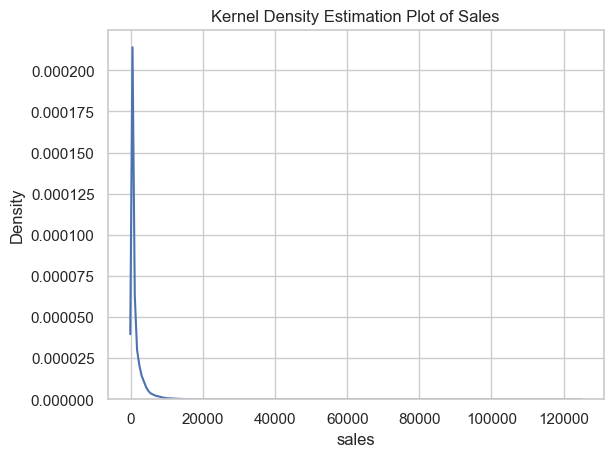

In [85]:
# check for distribution in sales
# Create a KDE plot for the 'sales' variable
sns.kdeplot(x='sales',data=merged3_train)
plt.title('Kernel Density Estimation Plot of Sales')

# Display the plot
plt.show()


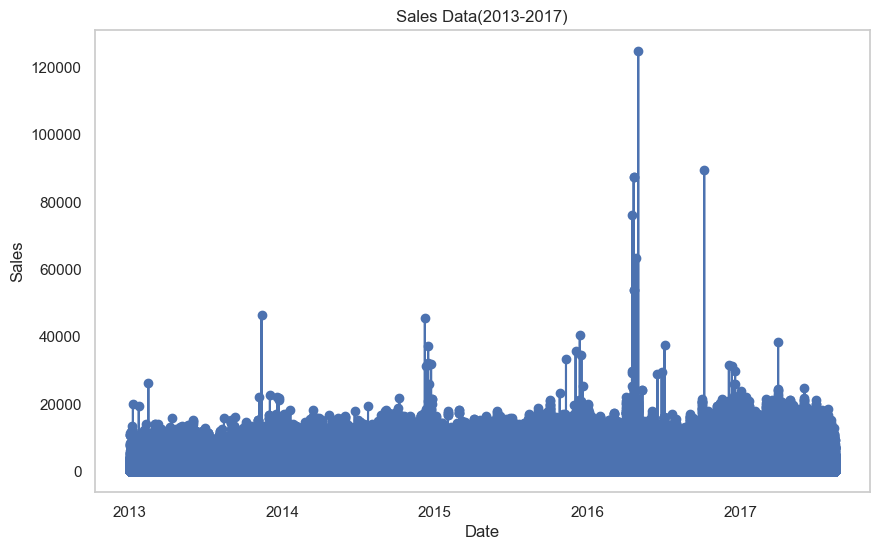

In [86]:
# checking for Trend,seasonality in sales date
plt.figure(figsize=(10, 6))
plt.plot(merged3_train.index, merged3_train["sales"], marker='o')
plt.title("Sales Data(2013-2017)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(False)
plt.show()

In [87]:
# Resample sales to monthly and weekly data 
monthly_df = merged3_train['sales'].resample('M').mean()
weekly_df= merged3_train['sales'].resample('W').mean()

In [88]:
# Resample transactions to monthly and weekly data 
monthly_tn = merged3_train['transactions'].resample('M').mean()
weekly_tn= merged3_train['transactions'].resample('W').mean()

In [89]:
monthly_df.head()

date
2013-01-31    186.952405
2013-02-28    193.581846
2013-03-31    206.880581
2013-04-30    205.639071
2013-05-31    210.184563
Freq: M, Name: sales, dtype: float64

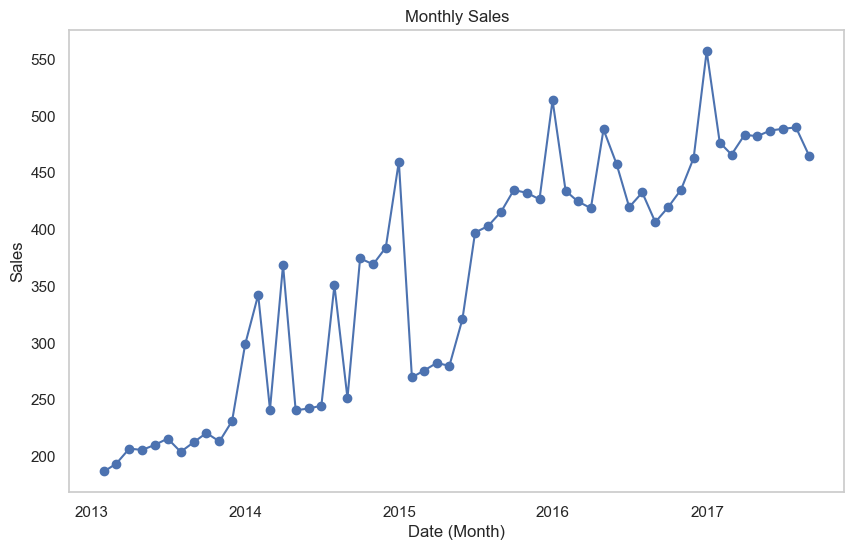

In [90]:
# lets look at the monthly sales to further understand the data
# Create a line plot of the monthly data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(monthly_df.index, monthly_df.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Date (Month)')
plt.ylabel('Sales')
plt.grid(False)
plt.show()

In [91]:
weekly_df.head()

date
2013-01-06    206.843478
2013-01-13    190.285220
2013-01-20    189.835452
2013-01-27    182.152050
2013-02-03    198.564267
Freq: W-SUN, Name: sales, dtype: float64

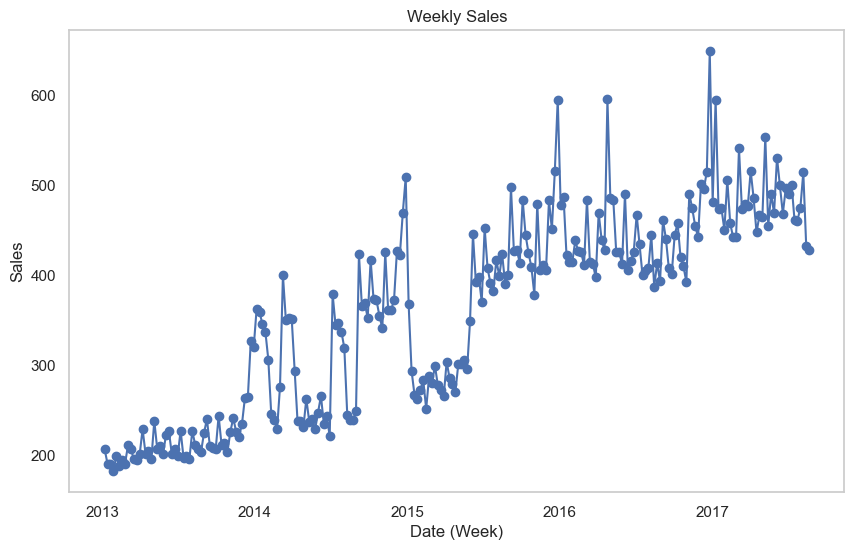

In [92]:
# lets look at the weekly sales to further understand the data
# Create a line plot of the weekly data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(weekly_df.index, weekly_df.values, marker='o', linestyle='-')
plt.title('Weekly Sales')
plt.xlabel('Date (Week)')
plt.ylabel('Sales')
plt.grid(False)
plt.show()

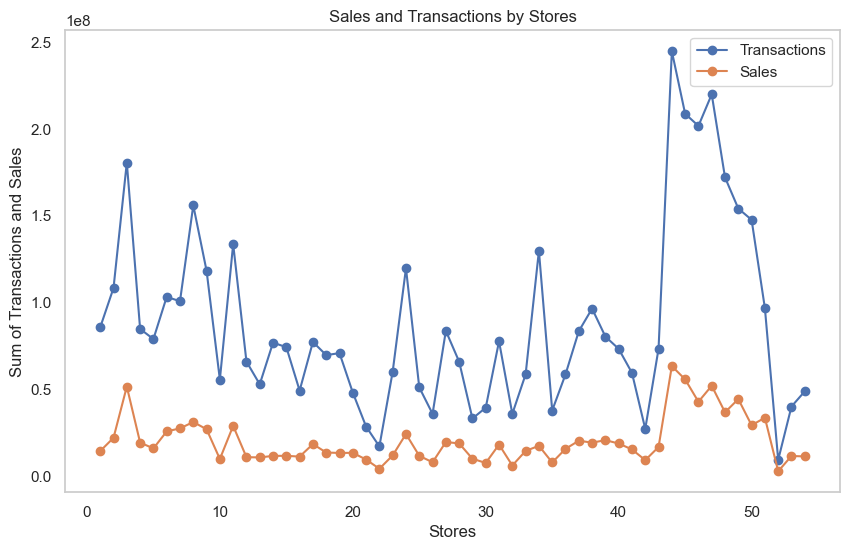

In [93]:
# Group data by stores and transaction, and calculate the sum of transactions
stores_transaction = merged3_train.groupby('store_nbr')["transactions"].sum().reset_index()
stores_sale = merged3_train.groupby('store_nbr')["sales"].sum().reset_index()

# Plotting the sum of transaction and sales for stores
plt.figure(figsize=(10, 6))
plt.plot(stores_transaction['store_nbr'], stores_transaction['transactions'], marker='o', label='Transactions')
plt.plot(stores_sale['store_nbr'], stores_sale['sales'], marker='o', label='Sales')
plt.title("Sales and Transactions by Stores")
plt.xlabel("Stores")
plt.ylabel("Sum of Transactions and Sales")

# Add a legend
plt.legend()

plt.grid(False)
plt.show()

In [94]:
merged3_train.head()

,id,store_nbr,family,sales,onpromotion,DayOfWeek,oil_prices,holiday_type,locale,locale_name,description,transferred,Unnamed: 0,city,state,stores_type,cluster,transactions
date,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,0,Quito,Pichincha,D,13,NaN
2013-01-01,1194.0,42.0,CELEBRATION,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2013-01-01,1193.0,42.0,BREAD/BAKERY,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2013-01-01,1192.0,42.0,BOOKS,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2013-01-01,1191.0,42.0,BEVERAGES,0.0,0.0,Tuesday,NaN,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN


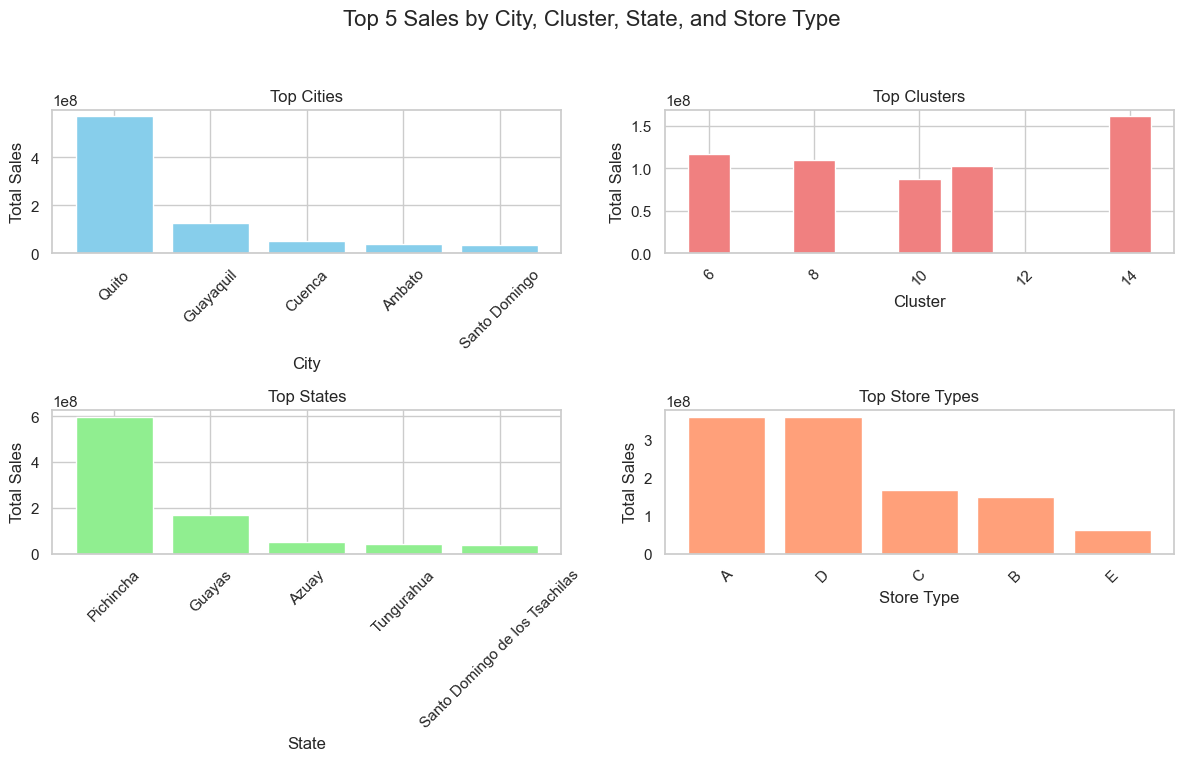

In [95]:
# Calculate total sales for the top 5 cities, clusters, states, and store types
top_cities = merged3_train.groupby('city')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()
top_clusters = merged3_train.groupby('cluster')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()
top_states = merged3_train.groupby('state')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()
top_store_types = merged3_train.groupby('stores_type')['sales'].sum().sort_values(ascending=False).nlargest(5).reset_index()

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Top 5 Sales by City, Cluster, State, and Store Type', fontsize=16)

# Plot top cities
axes[0, 0].bar(top_cities['city'], top_cities['sales'], color='skyblue')
axes[0, 0].set_title('Top Cities')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot top clusters
axes[0, 1].bar(top_clusters['cluster'], top_clusters['sales'], color='lightcoral')
axes[0, 1].set_title('Top Clusters')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].tick_params(axis='x', rotation=45)
# Plot top states
axes[1, 0].bar(top_states['state'], top_states['sales'], color='lightgreen')
axes[1, 0].set_title('Top States')
axes[1, 0].set_xlabel('State')
axes[1, 0].set_ylabel('Total Sales')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot top store types
axes[1, 1].bar(top_store_types['stores_type'], top_store_types['sales'], color='lightsalmon')
axes[1, 1].set_title('Top Store Types')
axes[1, 1].set_xlabel('Store Type')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid(False)
# Show the plot
plt.show()

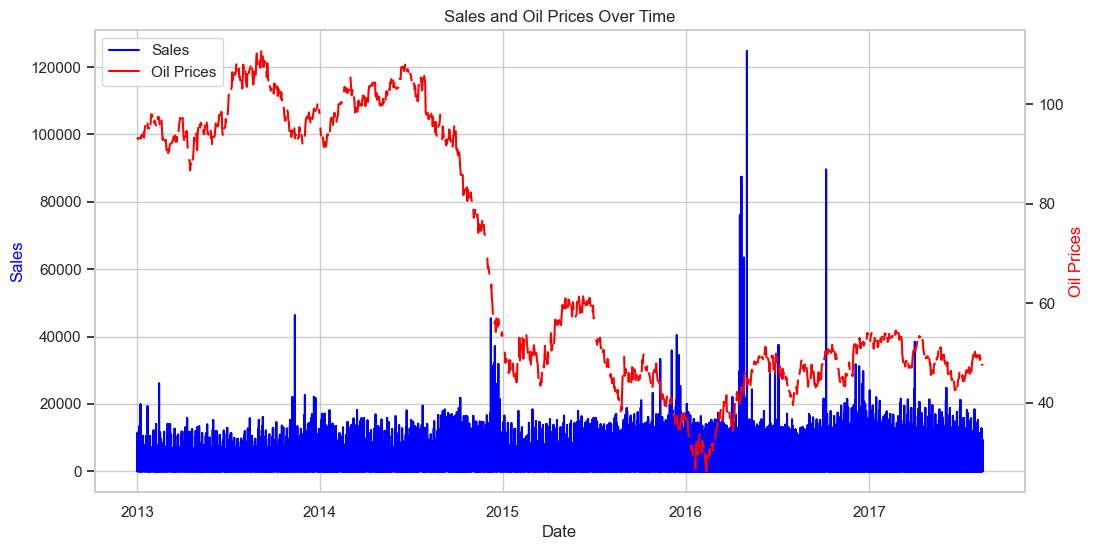

In [96]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot sales data as a blue line
ax.plot(merged3_train.index, merged3_train['sales'], color='blue', label='Sales')

# Add a secondary y-axis for oil prices
ax2 = ax.twinx()  # Create a twin axis that shares the same x-axis

# Plot oil prices data as a red line on the secondary axis
ax2.plot(merged3_train.index, merged3_train['oil_prices'], color='red', label='Oil Prices')

# Set labels and legends for both axes
ax.set_xlabel('Date')
ax.set_ylabel('Sales', color='blue')
ax2.set_ylabel('Oil Prices', color='red')

# Add legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Set a title
plt.title('Sales and Oil Prices Over Time')
plt.grid(False)

# Display the plot
plt.show()

In [97]:
# imputing the missing value 
merged3_train['oil_prices'].fillna(method='bfill', inplace=True)  # imputing with backward fill

In [98]:
merged3_train['oil_prices'].isna().sum()

0

In [99]:
# 'sales' and 'oil_prices' are the two variables to be tested
correlation_coefficient, p_value = stats.pearsonr(merged3_train['sales'], merged3_train['oil_prices'])

# 'correlation_coefficient' contains the Pearson correlation coefficient
# 'p_value' contains the p-value associated with the correlation

# Interpret the results
if p_value < 0.05:  # Adjust significance level as needed
    print(f"There is a statistically significant correlation (ρ = {correlation_coefficient:.2f}).")
else:
    print("There is no statistically significant correlation between sales and oil prices.")


There is a statistically significant correlation (ρ = -0.08).


In [100]:
merged3_train.head()

,id,store_nbr,family,sales,onpromotion,DayOfWeek,oil_prices,holiday_type,locale,locale_name,description,transferred,Unnamed: 0,city,state,stores_type,cluster,transactions
date,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,1.0,AUTOMOTIVE,0.0,0.0,Tuesday,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,0,Quito,Pichincha,D,13,NaN
2013-01-01,1194.0,42.0,CELEBRATION,0.0,0.0,Tuesday,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2013-01-01,1193.0,42.0,BREAD/BAKERY,0.0,0.0,Tuesday,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2013-01-01,1192.0,42.0,BOOKS,0.0,0.0,Tuesday,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN
2013-01-01,1191.0,42.0,BEVERAGES,0.0,0.0,Tuesday,93.139999,Holiday,National,Ecuador,Primer dia del ano,False,41,Cuenca,Azuay,D,2,NaN


In [101]:
merged3_train['holiday_type'].value_counts()

holiday_type
Holiday       304726
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

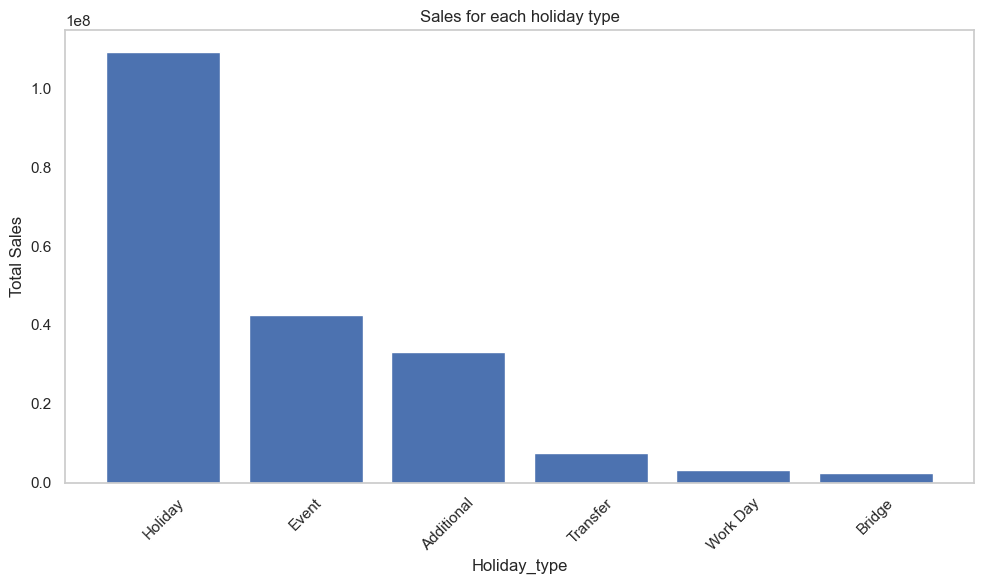

In [102]:
holiday_sales = merged3_train.groupby('holiday_type')['sales'].sum().sort_values(ascending=False).reset_index()

# Plotting the sales for each holiday type using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(holiday_sales["holiday_type"], holiday_sales["sales"])
plt.title("Sales for each holiday type")
plt.xlabel("Holiday_type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

In [103]:
holiday_sales

,holiday_type,sales
0,Holiday,1.092227e+08
1,Event,4.247747e+07
2,Additional,3.302028e+07
3,Transfer,7.501824e+06
4,Work Day,3.315924e+06
5,Bridge,2.388330e+06


In [104]:
# 'sales' and 'onpromotion' are the two variables to be tested
correlation_coefficient, p_value = stats.pearsonr(merged3_train['sales'], merged3_train['onpromotion'])

# 'correlation_coefficient' contains the Pearson correlation coefficient
# 'p_value' contains the p-value associated with the correlation

# Interpret the results
if p_value < 0.05:  # Adjust significance level as needed
    print(f"There is a statistically significant correlation (ρ = {correlation_coefficient:.2f}).")
else:
    print("There is no statistically significant correlation between sales and promotion of products.")


There is a statistically significant correlation (ρ = 0.43).


In [105]:
merged3_train.drop(['transactions','description','DayOfWeek','id'], axis=1, inplace= True)
merged3_test.drop('description', axis=1, inplace=True)

In [106]:
# check for missing values
merged3_train.isna().sum()

store_nbr             0
family                0
sales                 0
onpromotion           0
oil_prices            0
holiday_type    2551824
locale          2551824
locale_name     2551824
transferred     2551824
Unnamed: 0            0
city                  0
state                 0
stores_type           0
cluster               0
dtype: int64

In [107]:
# Create a SimpleImputer instance with the strategy to impute with 'No Holiday'
imputer = SimpleImputer(strategy='constant', fill_value='No Holiday')

# Specify the columns to impute
columns_to_impute = ['holiday_type', 'locale', 'locale_name', 'transferred']

# Apply imputation to the specified columns
merged3_train[columns_to_impute] = imputer.fit_transform(merged3_train[columns_to_impute])

In [108]:
merged3_test.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
oil_prices       7128
holiday_type    26730
locale          26730
locale_name     26730
transferred     26730
Unnamed: 0          0
city                0
state               0
stores_type         0
cluster             0
dtype: int64

In [109]:
# Set the 'date' column as the index in test
merged3_test.set_index('date', inplace=True)

In [110]:
merged3_test['oil_prices'].interpolate(method='time', inplace=True)  # Interpolate based on time
merged3_test[columns_to_impute] = imputer.transform(merged3_test[columns_to_impute])

In [111]:
merged3_train['family'].value_counts()

family
PRODUCE                       92558
HOME CARE                     92557
SEAFOOD                       92557
AUTOMOTIVE                    92556
LADIESWEAR                    92556
HOME APPLIANCES               92556
CLEANING                      92556
DAIRY                         92556
DELI                          92556
EGGS                          92556
LINGERIE                      92556
HOME AND KITCHEN II           92556
HOME AND KITCHEN I            92556
HARDWARE                      92556
GROCERY II                    92556
GROCERY I                     92556
LAWN AND GARDEN               92556
MAGAZINES                     92556
LIQUOR,WINE,BEER              92556
CELEBRATION                   92556
MEATS                         92556
PERSONAL CARE                 92556
PET SUPPLIES                  92556
PLAYERS AND ELECTRONICS       92556
POULTRY                       92556
PREPARED FOODS                92556
SCHOOL AND OFFICE SUPPLIES    92556
BABY CARE            

In [112]:
# define product category group
groups= {
    'Household Items': ['HOME CARE','CLEANING','HOME AND KITCHEN II','HOME AND KITCHEN I','PERSONAL CARE','PET SUPPLIES','BABY CARE','BEAUTY'],
    'Apparel and Fashion': ['LADIESWEAR','LINGERIE'],
    'Entertainment and Leisure': ['MAGAZINES','CELEBRATION','BOOKS'],
    'Hardware and Home tools': ['AUTOMOTIVE','HOME APPLIANCES','HARDWARE','LAWN AND GARDEN','PLAYERS AND ELECTRONICS','SCHOOL AND OFFICE SUPPLIES'],
    'Food and Bevarage': ['GROCERY I','GROCERY II','PRODUCE','SEAFOOD','DAIRY','DELI','EGGS','LIQUOR,WINE,BEER','MEATS','POULTRY','PREPARED FOODS','BEVERAGES','BREAD/BAKERY','FROZEN FOODS']

}

# create a product_category column based on mapping
merged3_train['product_category'] = merged3_train['family'].apply(lambda x: next((group for group, categories in groups.items() if x in categories),'other'))

In [113]:
# rename family to product
merged3_train.rename(columns={'family': 'product'}, inplace=True)
merged3_test.rename(columns={'family': 'product'}, inplace=True)

In [114]:
cat_train= merged3_train.select_dtypes(include='object')
cat_train.columns

Index(['product', 'holiday_type', 'locale', 'locale_name', 'transferred',
       'city', 'state', 'stores_type', 'product_category'],
      dtype='object')

In [115]:
# 'sales' is continuous, and categorical columns include 'state', 'city', 'product', 'holiday', etc.

# Set your desired significance level
alpha = 0.05

# Create a list to store the results
results = []

# Create a list of categorical columns to test
categorical_columns = ['state', 'product','stores_type','city', 'holiday_type','product_category','transferred','locale','locale_name']

# Perform ANOVA tests for each categorical variable
for column in categorical_columns:
    # Group the DataFrame by the current categorical column
    grouped_data = [group['sales'] for name, group in merged3_train.groupby(column)]
    
    # Perform the ANOVA test
    result = stats.f_oneway(*grouped_data)
    
    # Append the result to the list of results
    results.append((column, result))
    
    # Check the p-value to determine significance and print it
    if result.pvalue < alpha:
        print(f"There is a significant difference in sales across {column}. p-value: {result.pvalue:.4f}")
    else:
        print(f"There is no significant difference in sales across {column}. p-value: {result.pvalue:.4f}")

There is a significant difference in sales across state. p-value: 0.0000
There is a significant difference in sales across product. p-value: 0.0000
There is a significant difference in sales across stores_type. p-value: 0.0000
There is a significant difference in sales across city. p-value: 0.0000
There is a significant difference in sales across holiday_type. p-value: 0.0000
There is a significant difference in sales across product_category. p-value: 0.0000
There is a significant difference in sales across transferred. p-value: 0.0000
There is a significant difference in sales across locale. p-value: 0.0000
There is a significant difference in sales across locale_name. p-value: 0.0000


In [116]:
num_df= merged3_train.drop(['product', 'holiday_type', 'locale', 'locale_name', 'transferred',
       'city', 'state', 'stores_type', 'product_category'], axis=1)

In [117]:
num_df.columns

Index(['store_nbr', 'sales', 'onpromotion', 'oil_prices', 'Unnamed: 0',
       'cluster'],
      dtype='object')

<Axes: >

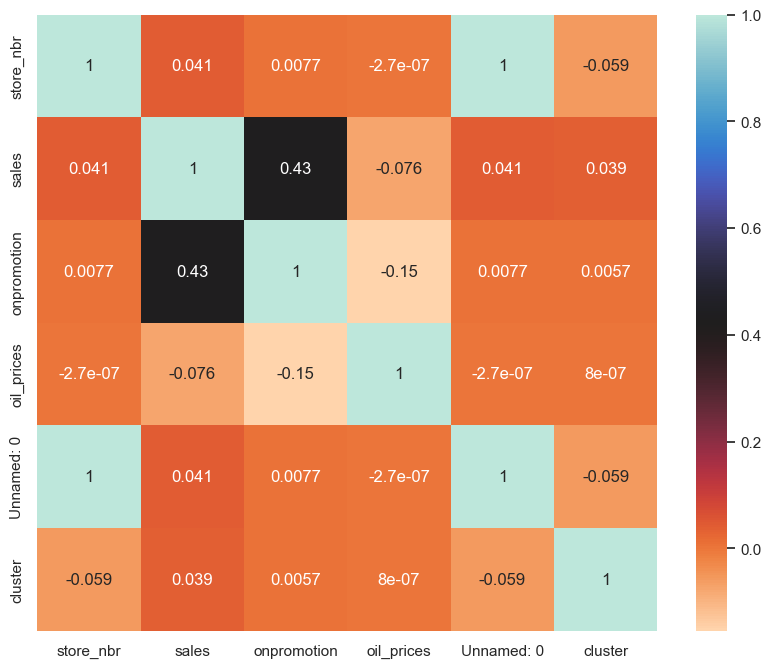

In [118]:
correlation = num_df.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(correlation, annot = True,cmap='icefire_r')

In [119]:
# performing feature selection
coff=abs(correlation['sales'])
coff=coff[coff>0.01]
coff.sort_values(ascending=False)

sales          1.000000
onpromotion    0.428241
oil_prices     0.075675
Unnamed: 0     0.041274
store_nbr      0.041274
cluster        0.038537
Name: sales, dtype: float64

In [120]:
# replace boolean values with strings to perform encoding
merged3_train['transferred'] = merged3_train['transferred'].replace({False: 'No', True: 'Yes'})
merged3_test['transferred'] = merged3_test['transferred'].replace({False: 'No', True: 'Yes'})

In [121]:
# Create additional columns for Year, Year-Month, Month, and Day for train
merged3_train['Year'] = merged3_train.index.year
merged3_train['Month'] = merged3_train.index.month
merged3_train['Day'] = merged3_train.index.day

In [122]:
# Create additional columns for Year, Year-Month, Month, and Day for test
merged3_test['Year'] = merged3_test.index.year
merged3_test['Month'] = merged3_test.index.month
merged3_test['Day'] = merged3_test.index.day

In [123]:
merged3_train.dtypes

store_nbr           float64
product              object
sales               float64
onpromotion         float64
oil_prices          float64
holiday_type         object
locale               object
locale_name          object
transferred          object
Unnamed: 0            int64
city                 object
state                object
stores_type          object
cluster               int64
product_category     object
Year                  int32
Month                 int32
Day                   int32
dtype: object

In [124]:
merged3_test.dtypes

id                int64
store_nbr         int64
product          object
onpromotion       int64
oil_prices      float64
holiday_type     object
locale           object
locale_name      object
transferred      object
Unnamed: 0        int64
city             object
state            object
stores_type      object
cluster           int64
Year              int32
Month             int32
Day               int32
dtype: object

In [125]:
# Perform additive decomposition
result_add = seasonal_decompose(merged3_train.groupby(merged3_train.index)['sales'].sum(), model='additive', extrapolate_trend='freq', period=12)

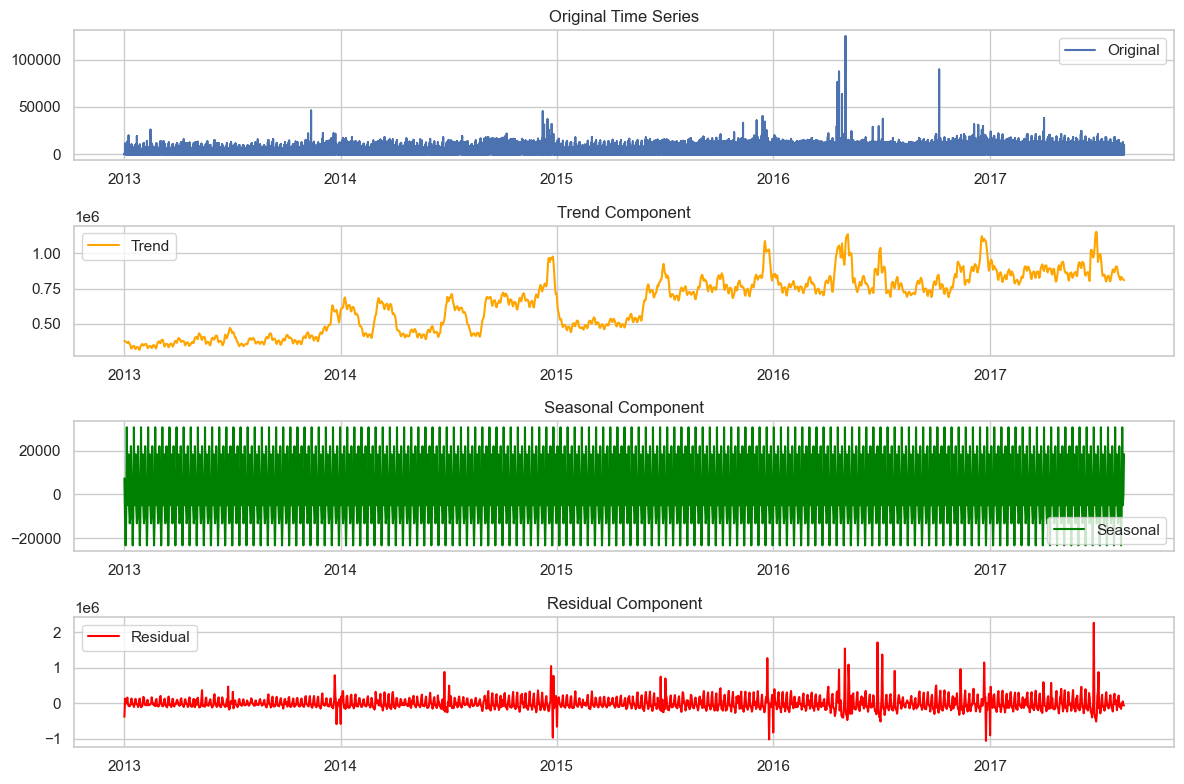

In [126]:
# Plot the original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)  # 4 rows, 1 column, 1st subplot
plt.plot(merged3_train.index, merged3_train['sales'], label='Original')
plt.title('Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(412)  # 4 rows, 1 column, 2nd subplot
plt.plot(result_add.trend.index, result_add.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

# Plot the seasonal component
plt.subplot(413)  # 4 rows, 1 column, 3rd subplot
plt.plot(result_add.seasonal.index, result_add.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

# Plot the residual component
plt.subplot(414)  # 4 rows, 1 column, 4th subplot
plt.plot(result_add.resid.index, result_add.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [127]:
# Define a function to perform the sampling
def train_sample(df, size):
    """
    Randomly samples rows from a DataFrame.

    Parameters:
     df (pd.DataFrame): DataFrame from which to sample.
     size (float): The proportion of rows to sample.

    Returns:
     pd.DataFrame: A sampled subset of DataFrame.
    """
    # Set a seed for reproducibility
    random.seed(42)

    # Calculate the number of rows to sample based on the specified size
    sample_size = int(size * len(df))

    # select rows randomly to create a sample
    sampled_data = df.sample(n=sample_size)

    return sampled_data

In [128]:
# Apply the function to sample the 40%
sampled_train = train_sample(merged3_train, 0.4)

In [129]:
sampled_train.shape

(1221740, 18)

In [130]:
sampled_train.head()

,store_nbr,product,sales,onpromotion,oil_prices,holiday_type,locale,locale_name,transferred,Unnamed: 0,city,state,stores_type,cluster,product_category,Year,Month,Day
date,,,,,,,,,,,,,,,,,,
2017-03-15,6.0,LAWN AND GARDEN,16.0,6.0,48.340000,No Holiday,No Holiday,No Holiday,No Holiday,5,Quito,Pichincha,D,13,Hardware and Home tools,2017,3,15
2013-11-21,4.0,CLEANING,650.0,0.0,95.349998,No Holiday,No Holiday,No Holiday,No Holiday,3,Quito,Pichincha,D,9,Household Items,2013,11,21
2015-02-22,13.0,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,49.560001,No Holiday,No Holiday,No Holiday,No Holiday,12,Latacunga,Cotopaxi,C,15,Hardware and Home tools,2015,2,22
2013-05-06,40.0,LINGERIE,19.0,0.0,95.800003,No Holiday,No Holiday,No Holiday,No Holiday,39,Machala,El Oro,C,3,Apparel and Fashion,2013,5,6
2015-05-12,19.0,MAGAZINES,0.0,0.0,60.720001,Holiday,Local,Puyo,No,18,Guaranda,Bolivar,C,15,Entertainment and Leisure,2015,5,12


In [131]:
sampled_train= sampled_train.sort_index()
sampled_train.head()

,store_nbr,product,sales,onpromotion,oil_prices,holiday_type,locale,locale_name,transferred,Unnamed: 0,city,state,stores_type,cluster,product_category,Year,Month,Day
date,,,,,,,,,,,,,,,,,,
2013-01-01,28.0,HOME APPLIANCES,0.0,0.0,93.139999,Holiday,National,Ecuador,No,27,Guayaquil,Guayas,E,10,Hardware and Home tools,2013,1,1
2013-01-01,18.0,PLAYERS AND ELECTRONICS,0.0,0.0,93.139999,Holiday,National,Ecuador,No,17,Quito,Pichincha,B,16,Hardware and Home tools,2013,1,1
2013-01-01,6.0,HOME APPLIANCES,0.0,0.0,93.139999,Holiday,National,Ecuador,No,5,Quito,Pichincha,D,13,Hardware and Home tools,2013,1,1
2013-01-01,35.0,BEAUTY,0.0,0.0,93.139999,Holiday,National,Ecuador,No,34,Playas,Guayas,C,3,Household Items,2013,1,1
2013-01-01,2.0,PRODUCE,0.0,0.0,93.139999,Holiday,National,Ecuador,No,1,Quito,Pichincha,D,13,Food and Bevarage,2013,1,1


In [132]:
# Sales data
time_series = sampled_train['sales']

# Perform the KPSS Test with trend and constant
kpss_result = KPSS(time_series, trend='ct')

# Perform the ADF Test with trend and constant
adf_result = ADF(time_series, trend='ct')

In [133]:
kpss_result.summary()

Test Statistic,1.781
P-value,0.000
Lags,224


In [134]:
adf_result.summary()

Test Statistic,-71.963
P-value,0.000
Lags,127


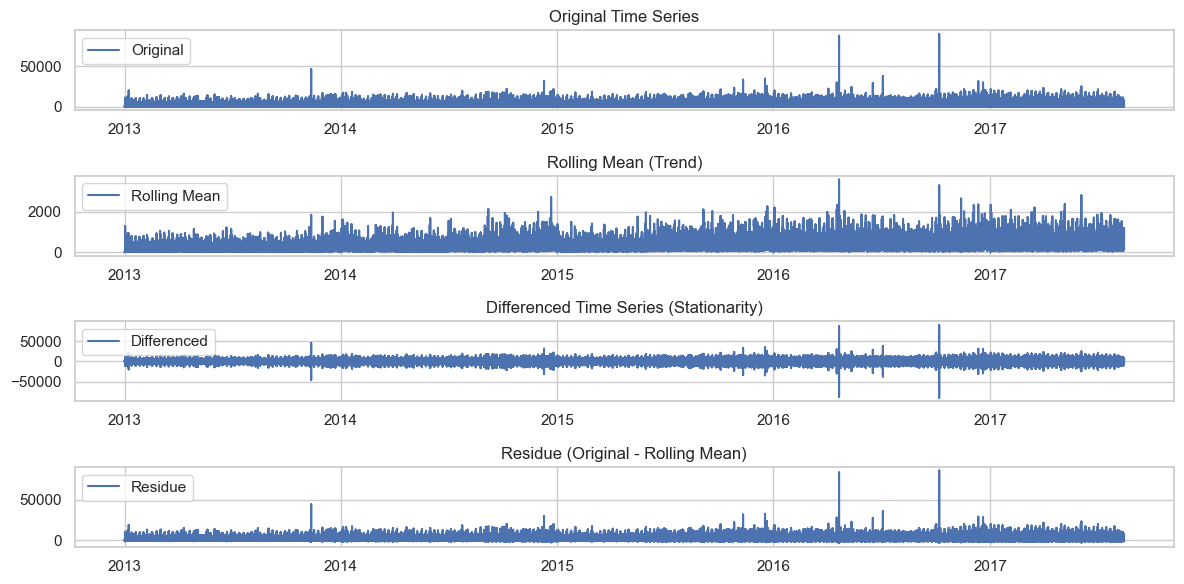

In [135]:


# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(sampled_train['sales'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Calculate and plot rolling mean (trend)
plt.subplot(412)
rolling_mean = sampled_train['sales'].rolling(window=30).mean()  # Adjust the window size as needed
plt.plot(rolling_mean, label='Rolling Mean')
plt.legend(loc='upper left')
plt.title('Rolling Mean (Trend)')

# Calculate and plot differenced time series (stationarity)
plt.subplot(413)
sampled_train['diff'] = sampled_train['sales'].diff(periods=1).fillna(0)  # Adjust the differencing order as needed
plt.plot(sampled_train['diff'], label='Differenced')
plt.legend(loc='upper left')
plt.title('Differenced Time Series (Stationarity)')

# Calculate and plot residue (original minus rolling mean)
plt.subplot(414)
residue = sampled_train['sales'] - rolling_mean
plt.plot(residue, label='Residue')
plt.legend(loc='upper left')
plt.title('Residue (Original - Rolling Mean)')

plt.tight_layout()
plt.show()

In [136]:
# display results
sampled_train[['sales', 'diff']].tail(5).style.set_caption('Sampled_train Time Series')

,sales,diff
date,,
2017-08-15 00:00:00,397.340000,-347.660000
2017-08-15 00:00:00,13.000000,-384.340000
2017-08-15 00:00:00,299.000000,286.000000
2017-08-15 00:00:00,66.000000,-233.000000
2017-08-15 00:00:00,3.000000,-63.000000


In [137]:
# check for stationarity
result = kpss(sampled_train['diff'], regression='c')  # 'c' for a constant trend
p_value = result[1]

if p_value > 0.05:
    print("The differenced data is stationary (p-value =", p_value, ")")
else:
    print("The differenced data is not stationary (p-value =", p_value, ")")

The differenced data is stationary (p-value = 0.1 )


C:\Users\manca\AppData\Local\Temp\ipykernel_2144\2489692502.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(sampled_train['diff'], regression='c')  # 'c' for a constant trend


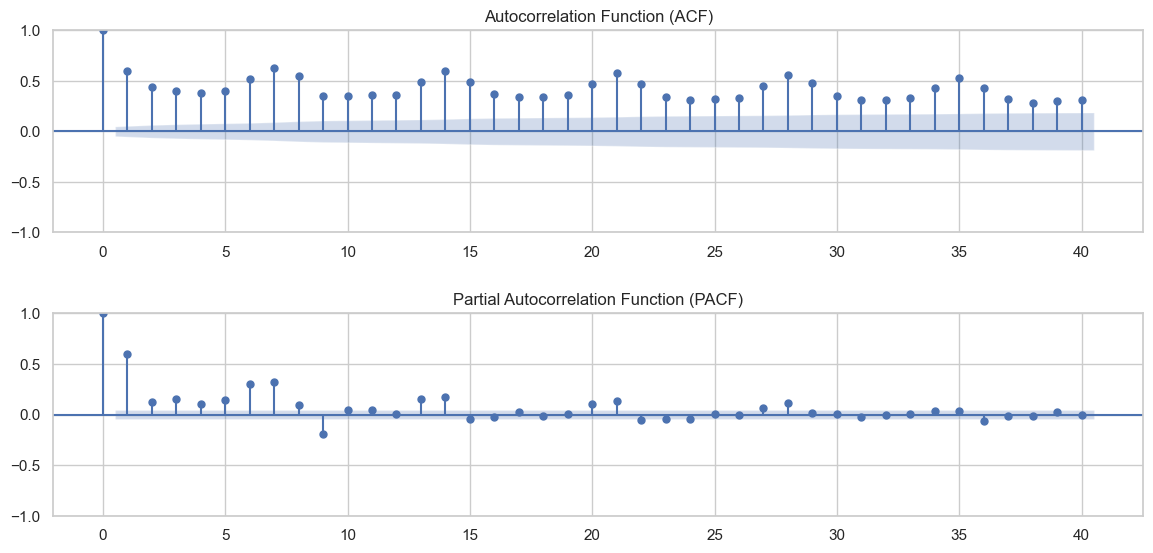

In [138]:
# Get the sales time series data based on the sample
ts = sampled_train.groupby(sampled_train.index)['sales'].sum()

# Create subplots with 2 rows and 1 column, specifying figsize
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot the Autocorrelation Function (ACF) on the first subplot (ax1)
sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")  # Add a title to the first subplot

# Plot the Partial Autocorrelation Function (PACF) on the second subplot (ax2)
sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")  # Add a title to the second subplot

# Add padding between the two subplots for better visualization
plt.tight_layout(pad=2.0)

# Display the plots
plt.show()

In [139]:
# Check for linear associations between the variables
correlation_matrix = sampled_train.phik_matrix()

interval columns not set, guessing: ['store_nbr', 'sales', 'onpromotion', 'oil_prices', 'Unnamed: 0', 'cluster', 'Year', 'Month', 'Day', 'diff']


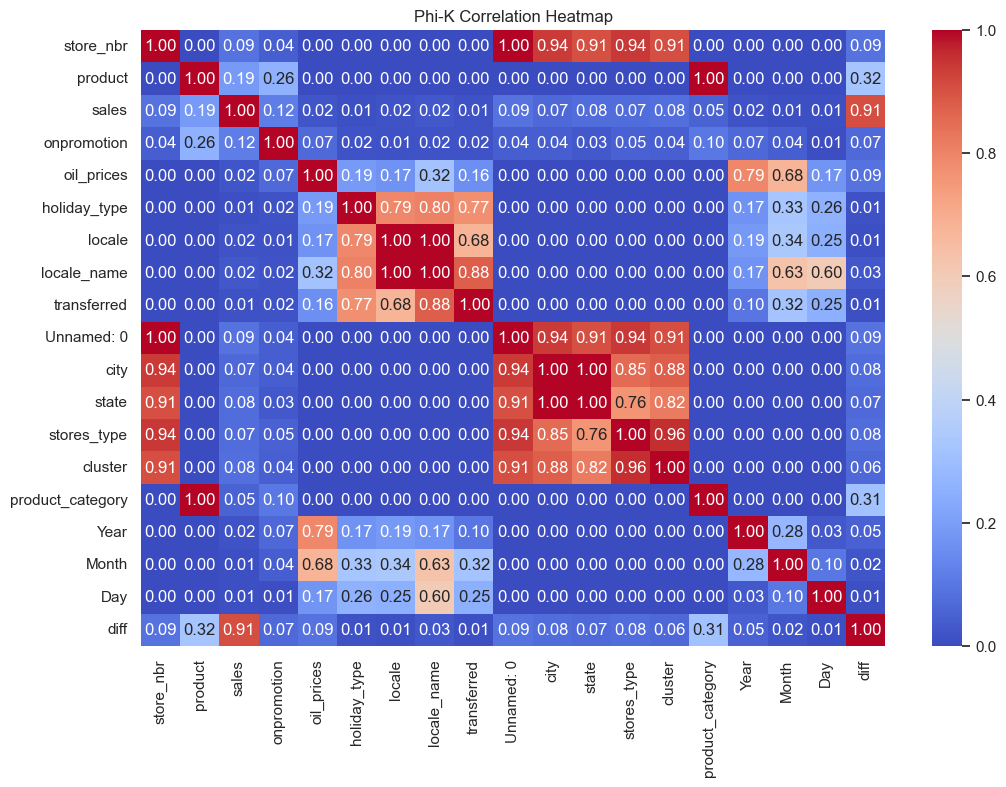

In [140]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8)) # Set the figure size

# Use seaborn to plot the matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Set the plot title
plt.title("Phi-K Correlation Heatmap")

# Show the plot
plt.show()

In [141]:
# performing feature selection
coff=abs(correlation_matrix['sales'])
coff.sort_values(ascending=False)

sales               1.000000
diff                0.907484
product             0.189272
onpromotion         0.115284
Unnamed: 0          0.089610
store_nbr           0.089610
cluster             0.080132
state               0.075042
stores_type         0.074895
city                0.065562
product_category    0.051992
locale_name         0.023545
oil_prices          0.019949
locale              0.018333
Year                0.017273
transferred         0.013209
Day                 0.011287
holiday_type        0.011216
Month               0.011068
Name: sales, dtype: float64

In [142]:
# since family is more correlated than product_category, we drop the product_category and any other variable not required for training
sampled_train.drop(['product_category','locale_name','locale','holiday_type','transferred'], axis=1, inplace= True)
# drop locale_name in test
merged3_test.drop(['locale_name','locale','holiday_type','transferred'], axis=1, inplace=True)

In [143]:
sampled_train.to_csv("sampled_train.csv", index=False)


In [144]:
sampled_train.columns

Index(['store_nbr', 'product', 'sales', 'onpromotion', 'oil_prices',
       'Unnamed: 0', 'city', 'state', 'stores_type', 'cluster', 'Year',
       'Month', 'Day', 'diff'],
      dtype='object')

In [145]:
# Specify the categorical columns to one-hot encode
train_columns = ['product', 'city', 'state', 'stores_type']

# Perform one-hot encoding
encoded_train = pd.get_dummies(sampled_train, columns=train_columns)

# Get a list of columns that were not one-hot encoded
remaining_columns = [col for col in sampled_train.columns if col not in train_columns]

# Add the remaining columns to the encoded_train DataFrame
for col in remaining_columns:
    encoded_train[col] = sampled_train[col]

# Display the updated DataFrame with one-hot encoding and the remaining columns
print(encoded_train)

            store_nbr   sales  onpromotion  oil_prices  Unnamed: 0  cluster  \
date                                                                          
2013-01-01       28.0    0.00          0.0   93.139999          27       10   
2013-01-01       18.0    0.00          0.0   93.139999          17       16   
2013-01-01        6.0    0.00          0.0   93.139999           5       13   
2013-01-01       35.0    0.00          0.0   93.139999          34        3   
2013-01-01        2.0    0.00          0.0   93.139999           1       13   
...               ...     ...          ...         ...         ...      ...   
2017-08-15       52.0  397.34          0.0   47.570000          51       11   
2017-08-15       34.0   13.00          0.0   47.570000          33        6   
2017-08-15        7.0  299.00          0.0   47.570000           6        8   
2017-08-15       29.0   66.00          5.0   47.570000          28       10   
2017-08-15        1.0    3.00          0.0   47.5700

In [146]:
encoded_train.head()

,store_nbr,sales,onpromotion,oil_prices,Unnamed: 0,cluster,Year,Month,Day,diff,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,stores_type_A,stores_type_B,stores_type_C,stores_type_D,stores_type_E
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,28.0,0.0,0.0,93.139999,27,10,2013,1,1,0.0,...,False,False,False,False,False,False,False,False,False,True
2013-01-01,18.0,0.0,0.0,93.139999,17,16,2013,1,1,0.0,...,False,True,False,False,False,False,True,False,False,False
2013-01-01,6.0,0.0,0.0,93.139999,5,13,2013,1,1,0.0,...,False,True,False,False,False,False,False,False,True,False
2013-01-01,35.0,0.0,0.0,93.139999,34,3,2013,1,1,0.0,...,False,False,False,False,False,False,False,True,False,False
2013-01-01,2.0,0.0,0.0,93.139999,1,13,2013,1,1,0.0,...,False,True,False,False,False,False,False,False,True,False


In [147]:
merged3_test.columns

Index(['id', 'store_nbr', 'product', 'onpromotion', 'oil_prices', 'Unnamed: 0',
       'city', 'state', 'stores_type', 'cluster', 'Year', 'Month', 'Day'],
      dtype='object')

In [148]:
# drop id column
merged3_test.drop('id', axis=1, inplace=True)

In [149]:
# Specify the categorical columns to one-hot encode
test_columns = ['product', 'city', 'state', 'stores_type']

# Perform one-hot encoding
encoded_test = pd.get_dummies(merged3_test, columns=test_columns)

# Get a list of columns that were not one-hot encoded
remaining_columns = [col for col in merged3_test.columns if col not in test_columns]

# Add the remaining columns to the encoded_train DataFrame
for col in remaining_columns:
    encoded_test[col] = merged3_test[col]

# Display the updated DataFrame with one-hot encoding and the remaining columns
print(encoded_test.head())

            store_nbr  onpromotion  oil_prices  Unnamed: 0  cluster  Year  \
date                                                                        
2017-08-16          1            0   46.799999           0       13  2017   
2017-08-16          1            0   46.799999           0       13  2017   
2017-08-16          1            2   46.799999           0       13  2017   
2017-08-16          1           20   46.799999           0       13  2017   
2017-08-16          1            0   46.799999           0       13  2017   

            Month  Day  product_AUTOMOTIVE  product_BABY CARE  ...  \
date                                                           ...   
2017-08-16      8   16                True              False  ...   
2017-08-16      8   16               False               True  ...   
2017-08-16      8   16               False              False  ...   
2017-08-16      8   16               False              False  ...   
2017-08-16      8   16               Fal

In [150]:
encoded_test.head()

,store_nbr,onpromotion,oil_prices,Unnamed: 0,cluster,Year,Month,Day,product_AUTOMOTIVE,product_BABY CARE,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,stores_type_A,stores_type_B,stores_type_C,stores_type_D,stores_type_E
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,46.799999,0,13,2017,8,16,True,False,...,False,True,False,False,False,False,False,False,True,False
2017-08-16,1,0,46.799999,0,13,2017,8,16,False,True,...,False,True,False,False,False,False,False,False,True,False
2017-08-16,1,2,46.799999,0,13,2017,8,16,False,False,...,False,True,False,False,False,False,False,False,True,False
2017-08-16,1,20,46.799999,0,13,2017,8,16,False,False,...,False,True,False,False,False,False,False,False,True,False
2017-08-16,1,0,46.799999,0,13,2017,8,16,False,False,...,False,True,False,False,False,False,False,False,True,False


In [151]:
encoded_test.dtypes

store_nbr          int64
onpromotion        int64
oil_prices       float64
Unnamed: 0         int64
cluster            int64
                  ...   
stores_type_A       bool
stores_type_B       bool
stores_type_C       bool
stores_type_D       bool
stores_type_E       bool
Length: 84, dtype: object

In [152]:
encoded_train.dtypes

store_nbr        float64
sales            float64
onpromotion      float64
oil_prices       float64
Unnamed: 0         int64
                  ...   
stores_type_A       bool
stores_type_B       bool
stores_type_C       bool
stores_type_D       bool
stores_type_E       bool
Length: 86, dtype: object

In [153]:
# convert float to integer
encoded_train['store_nbr'] = encoded_train['store_nbr'].astype(int)
encoded_train['onpromotion'] = encoded_train['onpromotion'].astype(int)

In [154]:
# Convert int64 to int32 due to memory capacity
encoded_train['cluster'] = encoded_train['cluster'].astype('int32')
encoded_test['cluster'] = encoded_test['cluster'].astype('int32')
encoded_test['store_nbr'] = encoded_test['store_nbr'].astype('int32')
encoded_test['onpromotion'] = encoded_test['onpromotion'].astype('int32')
# Convert float64 to float32
encoded_train['sales'] = encoded_train['sales'].astype('float32')
encoded_train['oil_prices'] = encoded_train['oil_prices'].astype('float32')
encoded_test['oil_prices'] = encoded_test['oil_prices'].astype('float32')

In [155]:
# drop the sales columns as we have now differenced the sales
encoded_train.drop('sales', axis=1, inplace= True)

In [156]:
# rename 'diff' to 'diff_sales'
encoded_train.rename(columns={'diff': 'dff_sales'}, inplace=True)

In [157]:
# calculates the minimum value in the 'sales' column
# then subtracts the minimum value found in step 1 from every value in the 'sales' column and then adds 1 to each of these values.
encoded_train['dff_sales'] = encoded_train['dff_sales'] - encoded_train['dff_sales'].min() + 1

In [158]:
encoded_train.shape

(1221740, 85)

In [159]:
## splitting data to train and evalution
train_data = encoded_train[:1000000]
eval = encoded_train[1000000:]

In [160]:
# Training data 
y_train=train_data["dff_sales"]
X_train = train_data.drop(columns = ["dff_sales"])

# evaluating data 
y_eval = eval["dff_sales"]
X_eval = eval.drop(columns = ["dff_sales"])

In [161]:
y_train.shape

(1000000,)

In [162]:
# Create an instance of the RandomForestRegressor
rf= RandomForestRegressor(random_state=42) 
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_eval)
mse_rf= mean_squared_error(y_eval, rf_pred)
rmse_rf= mse_rf**.05
rmsle_rf= np.sqrt(mean_squared_log_error(y_eval, rf_pred))
msle_rf = mean_squared_log_error(y_eval, rf_pred)
print(mse_rf)
print(rmse_rf)
print(rmsle_rf)
print(msle_rf)

2366712.0630064383
2.08308634100777
0.01771733487994221
0.00031390395524801684


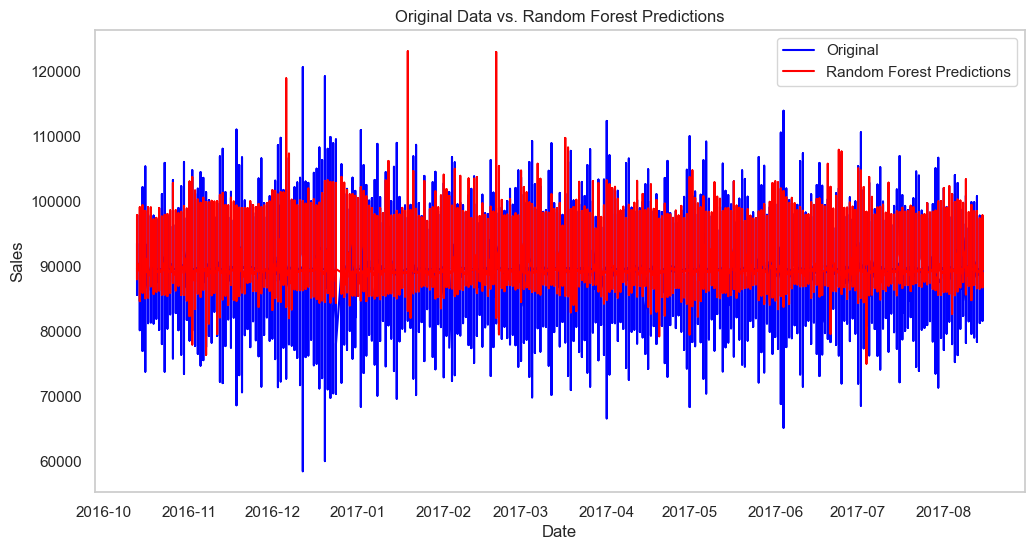

In [163]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the original data
plt.plot(y_eval.index, y_eval.values, label='Original', color='blue')

# Plot the ARIMA predictions
plt.plot(y_eval.index, rf_pred, label='Random Forest Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. Random Forest Predictions')
plt.legend()
plt.grid(False)

plt.show()

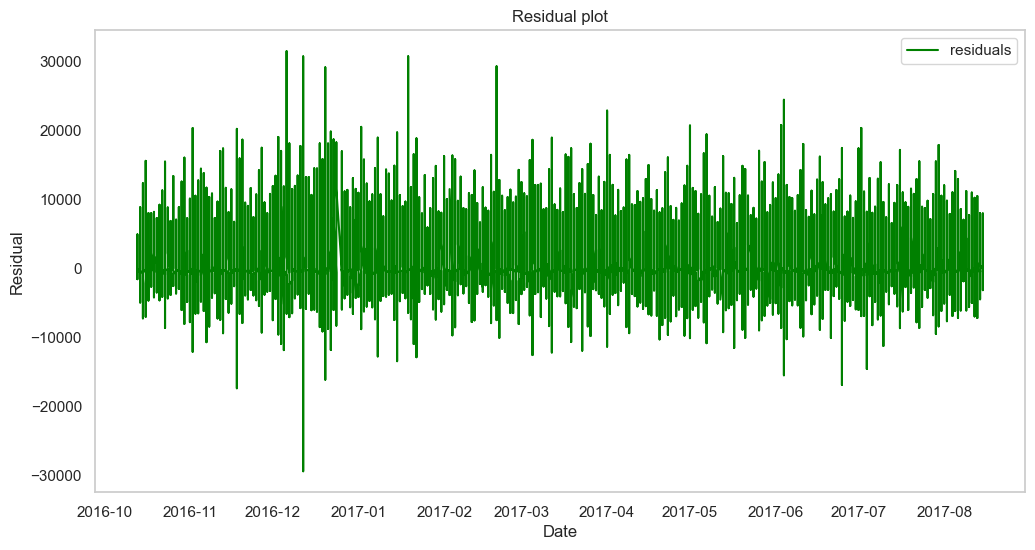

In [164]:
# plot the residual plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the residual data
plt.plot(y_eval.index, (rf_pred - y_eval.values), label='residuals', color='green')

plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.legend()
plt.grid(False)
plt.show()

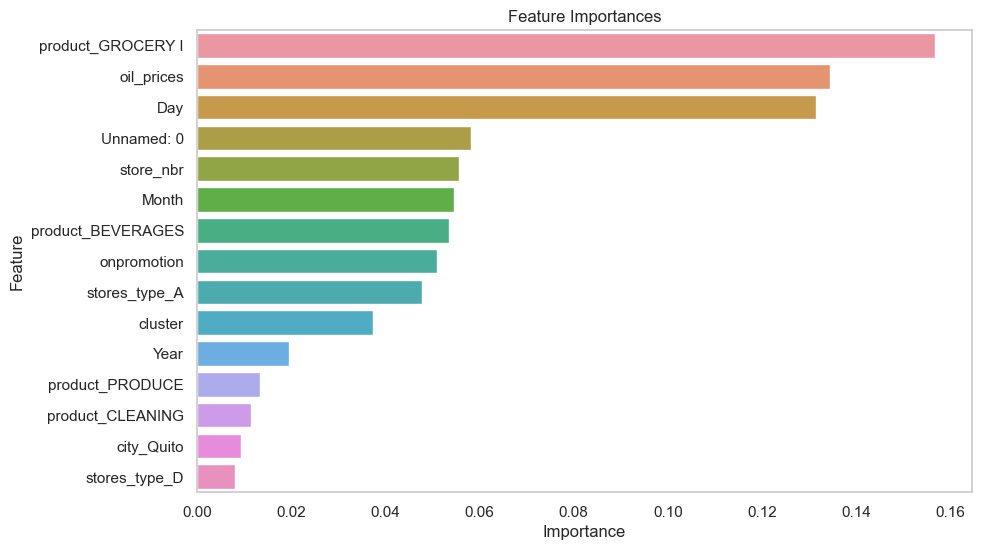

In [165]:
rf_importance=rf.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(False)
plt.show()

In [166]:
# Create an instance of the Decision Trees
dt= DecisionTreeRegressor(random_state=42) 
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_eval)
mse_dt= mean_squared_error(y_eval, dt_pred)
rmse_dt= mse_dt**.05
rmsle_dt= np.sqrt(mean_squared_log_error(y_eval, dt_pred))
msle_dt = mean_squared_log_error(y_eval, rf_pred)
print(mse_dt)
print(rmse_dt)
print(rmsle_dt)
print(msle_dt)

4932479.550592865
2.1609925251706463
0.027135712178117395
0.00031390395524801684


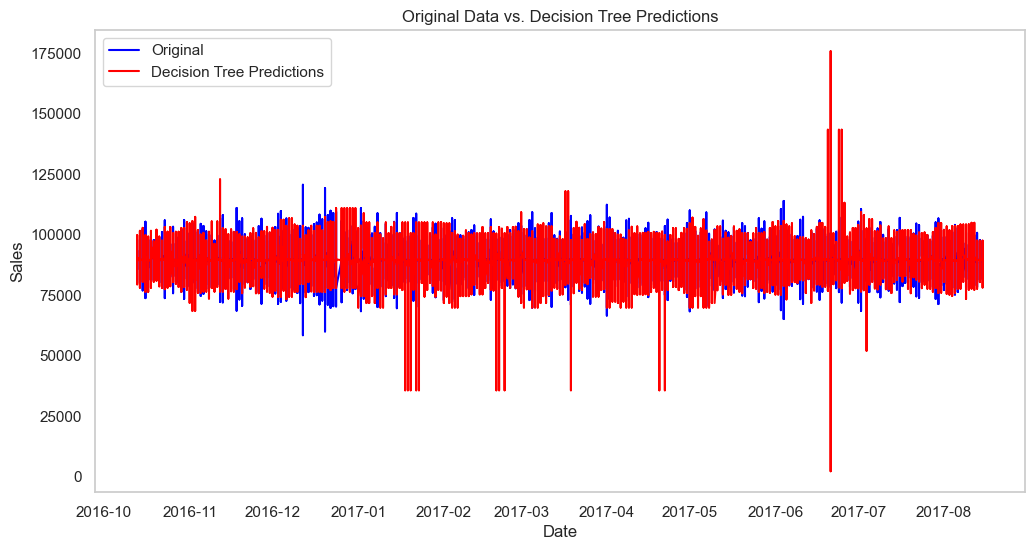

In [167]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the original data
plt.plot(y_eval.index, y_eval.values, label='Original', color='blue')

# Plot the ARIMA predictions
plt.plot(y_eval.index, dt_pred, label='Decision Tree Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. Decision Tree Predictions')
plt.legend()
plt.grid(False)

plt.show()

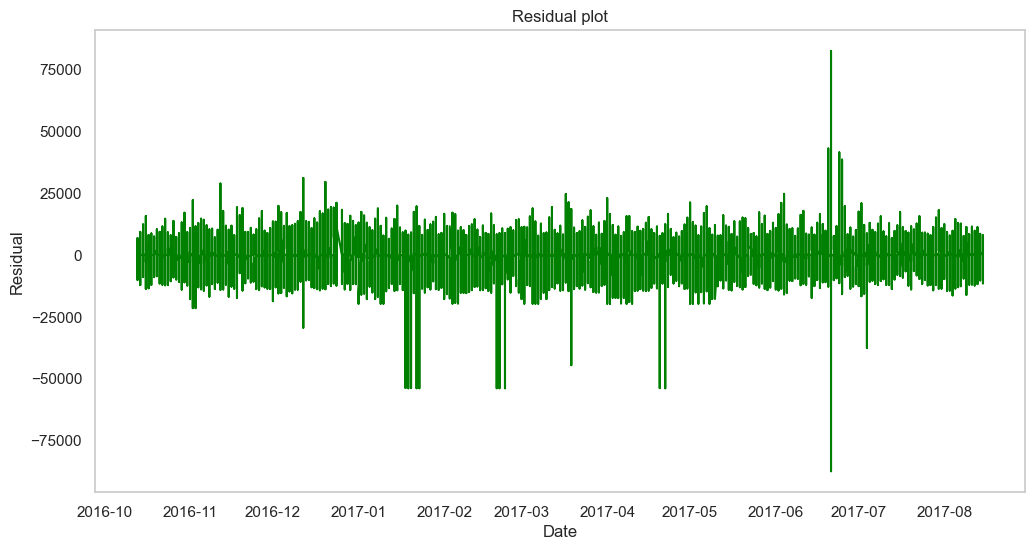

In [168]:
# plot the residual plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the residual data
plt.plot(y_eval.index, (dt_pred - y_eval.values), label='residuals', color='green')

plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.grid(False)

plt.show()

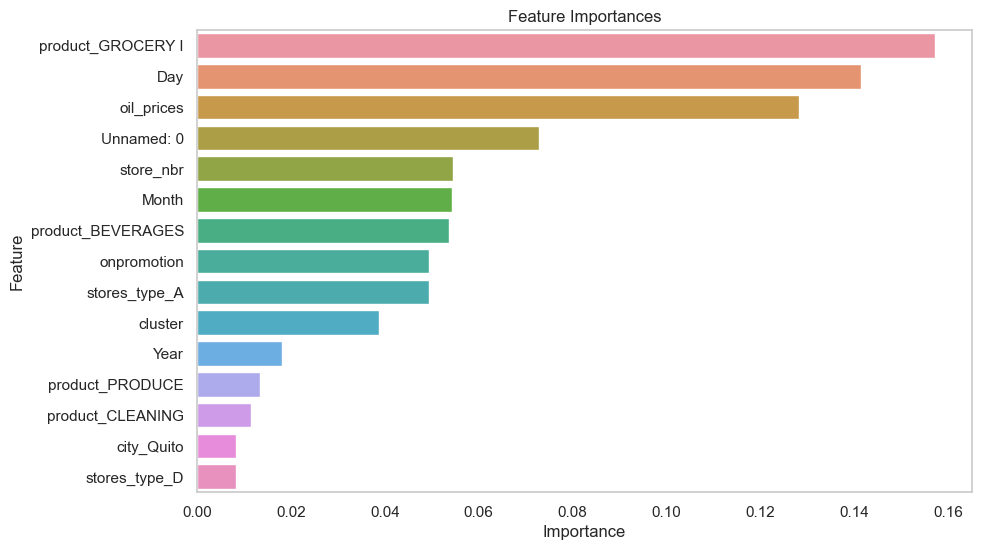

In [169]:
dt_importance=dt.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance_dt = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_importance})

# Sort the DataFrame by importance
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(False)
plt.show()

In [170]:
# group the data by date and average sales for stat models
data = train_data.groupby(train_data.index)['dff_sales'].sum().reset_index()
eval = eval.groupby(eval.index)['dff_sales'].sum().reset_index()

In [171]:
# setting first name as index column
data.set_index('date', inplace=True)
eval.set_index('date', inplace=True)

In [172]:
data.head()

,dff_sales
date,
2013-01-01,63144988.80
2013-01-02,64846768.64
2013-01-03,59562298.40
2013-01-04,60099694.56
2013-01-05,63145114.80


In [173]:
model= AutoReg(data, lags=5).fit()

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              dff_sales   No. Observations:                 1380
Model:                     AutoReg(5)   Log Likelihood              -24198.601
Method:               Conditional MLE   S.D. of innovations       10639076.303
Date:                Tue, 03 Oct 2023   AIC                          48411.203
Time:                        12:26:08   BIC                          48447.786
Sample:                             5   HQIC                         48424.891
                                 1380                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.323e+07    3.9e+06     16.233      0.000    5.56e+07    7.09e+07
dff_sales.L1     0.0271      0.027      1.002      0.317      -0.026       0.080
dff_sales.L2    -0.0122      0.027     -0.450      0.653      -0.065       0.041
dff_sales.L3    -0.0200      0.027     -0.742      0.458      -0.073       0.033
dff_sales.L4     0.0194      0.027      0.717      0.474      -0.034       0.072
dff_sales.L5     0.0117      0.027      0.433      0.665      -0.041       0.065
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2774           -0.0000j            2.2774           -0.0000
AR.2            0.5381           -2.1178j            2.1851           -0.2104
AR.3            0.5381           +2.1178j            2.1851            0.2104
AR.4           -2.5038           -1.2598j            2.8028           -0.4258
AR.5           -2.5038           +1.2598j            2.8028            0.4258
-----------------------------------------------------------------------------
"""

In [175]:
# make predictions on eval data
AR_pred=model.predict(start=len(data),
                      end=len(data)+len(eval)-1,
                      dynamic = False
                      )

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [176]:
# evaluate our models
mse_ar= mean_squared_error(eval, AR_pred)
msle_ar=mean_squared_log_error(eval, AR_pred)
rmse_ar= np.sqrt(mean_squared_error(eval, AR_pred)).round(2)
rmsle_ar= np.sqrt(mean_squared_log_error(eval, AR_pred)).round(2)

results=pd.DataFrame([['AR',mse_ar, msle_ar, rmse_ar, rmsle_ar]], columns= ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,1.227554e+14,0.015058,11079505.36,0.12


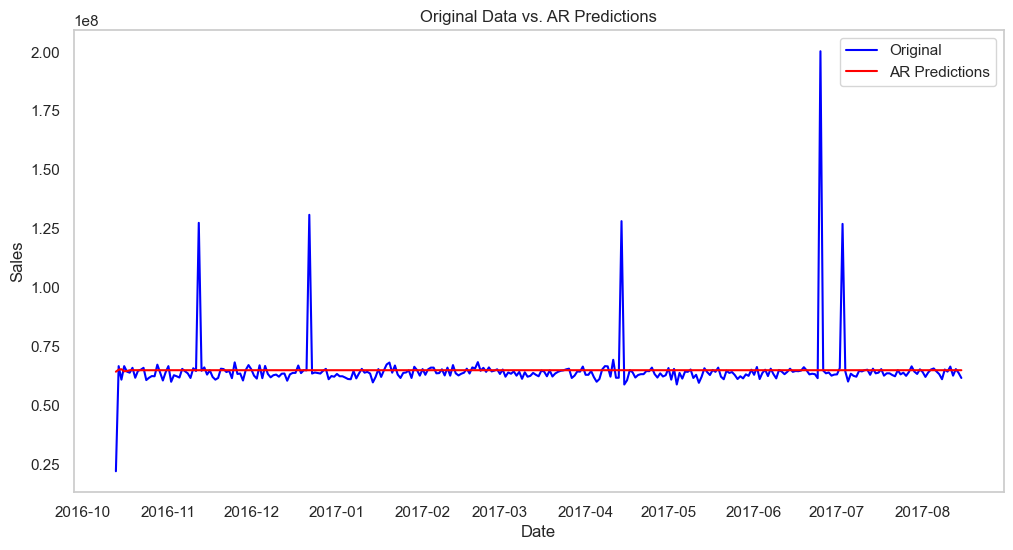

In [177]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the original data
plt.plot(eval.index, eval.values, label='Original', color='blue')

# Plot the ARIMA predictions
plt.plot(eval.index, AR_pred, label='AR Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. AR Predictions')
plt.legend()
plt.grid(False)

plt.show()

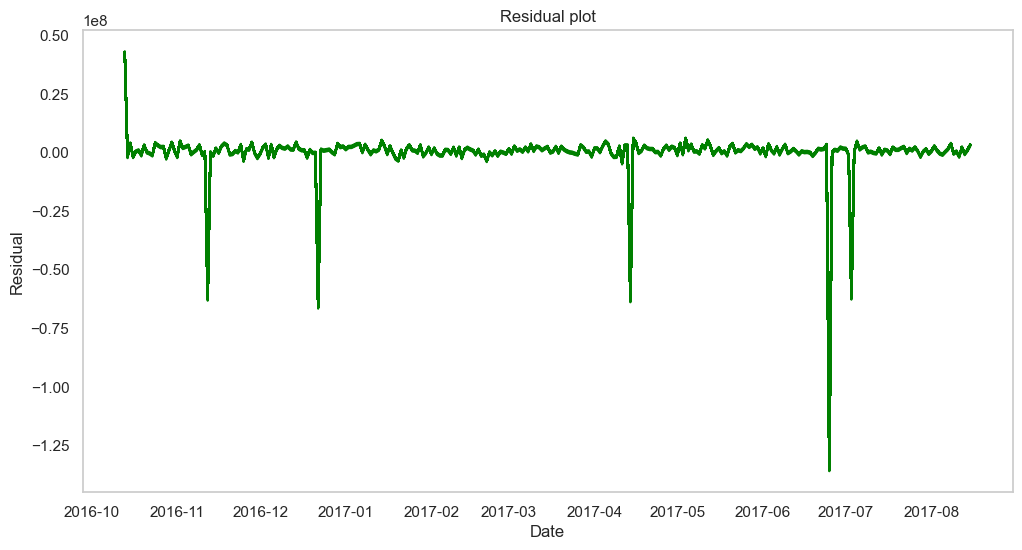

In [178]:
# plot the residual plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the residual data
plt.plot(eval.index, (AR_pred.values - eval.values), label='residuals', color='green')

plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.grid(False)
plt.show()

In [179]:
model = SARIMAX(data,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()
model_fit.summary()

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          dff_sales   No. Observations:                 1380
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -24345.380
Date:                            Tue, 03 Oct 2023   AIC                          48700.760
Time:                                    12:26:15   BIC                          48726.862
Sample:                                         0   HQIC                         48710.529
                                           - 1380                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0100      0.044      0.228      0.820      -0.076       0.096
ma.L1         -0.8584      0.033    -26.030      0.000      -0.923      -0.794
ar.S.L12      -0.0357      0.065     -0.547      0.584      -0.164       0.092
ma.S.L12      -0.9557      0.028    -34.579      0.000      -1.010      -0.902
sigma2      2.978e+14   2.52e-16   1.18e+30      0.000    2.98e+14    2.98e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):            659570.11
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             8.07
Prob(H) (two-sided):                  0.53   Kurtosis:                       109.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.92e+44. Standard errors may be unstable.
"""

In [180]:
# make predictions on the eval data
SARIMA_pred=model_fit.predict(start=len(data),
                      end=len(data)+len(eval)-1,
                      type = 'levels'
                      )

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [181]:
# evaluate our models
mse_sar= mean_squared_error(eval, SARIMA_pred)
msle_sar=mean_squared_log_error(eval, SARIMA_pred)
rmse_sar= np.sqrt(mean_squared_error(eval, SARIMA_pred)).round(2)
rmsle_sar= np.sqrt(mean_squared_log_error(eval, SARIMA_pred)).round(2)

results=pd.DataFrame([['SARIMA',mse_sar, msle_sar, rmse_sar, rmsle_sar]], columns= ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,SARIMA,1.797443e+14,0.028543,13406876.82,0.17


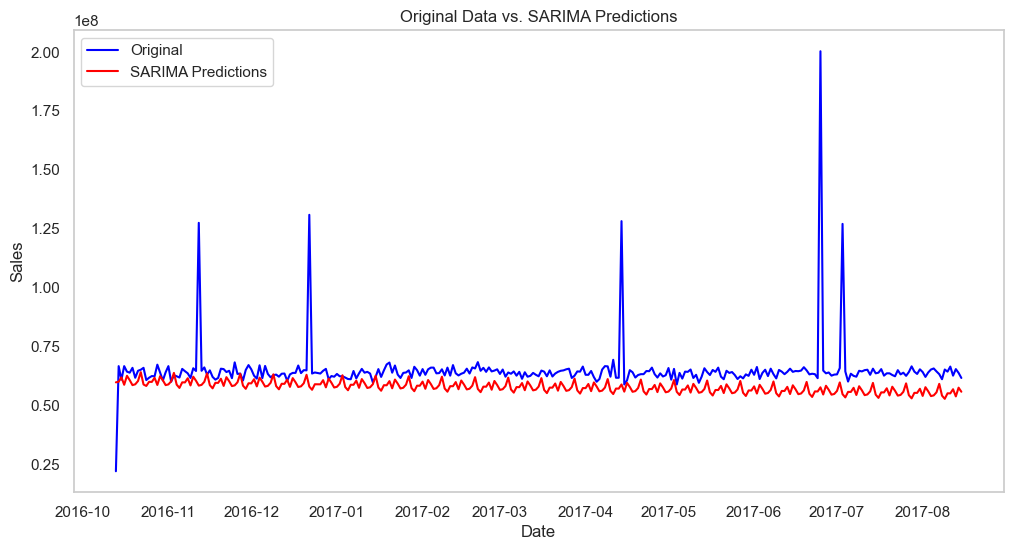

In [182]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the original data
plt.plot(eval.index, eval.values, label='Original', color='blue')

# Plot the SARIMA predictions
plt.plot(eval.index, SARIMA_pred, label='SARIMA Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. SARIMA Predictions')
plt.legend()
plt.grid(False)

plt.show()

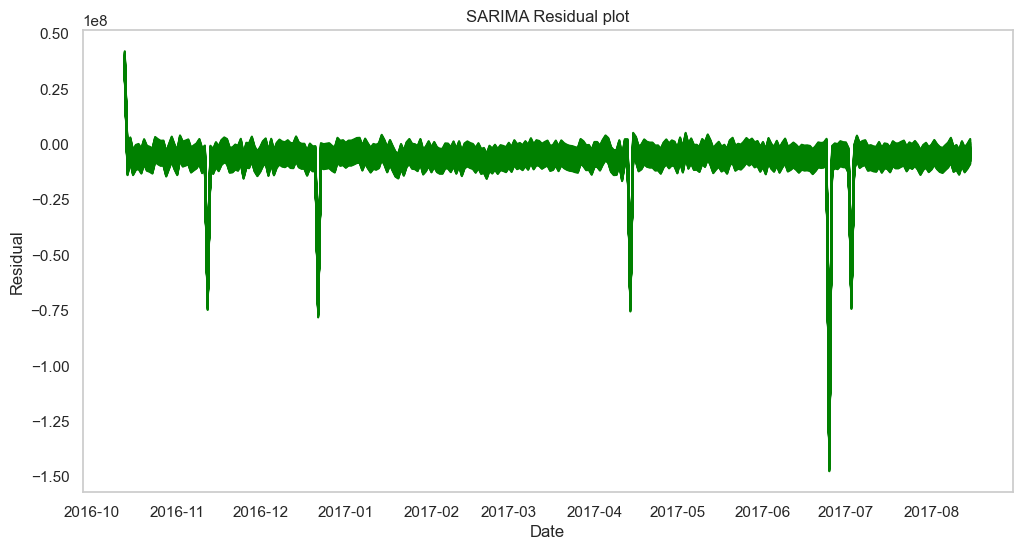

In [183]:
# plot the residual plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the residual data
plt.plot(eval.index, (SARIMA_pred.values - eval.values), label='residuals', color='green')

plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('SARIMA Residual plot')
plt.grid(False)
plt.show()

In [184]:
# Get the sales time series data based on the sample
data_sales = encoded_train.groupby(encoded_train.index)['dff_sales'].sum()

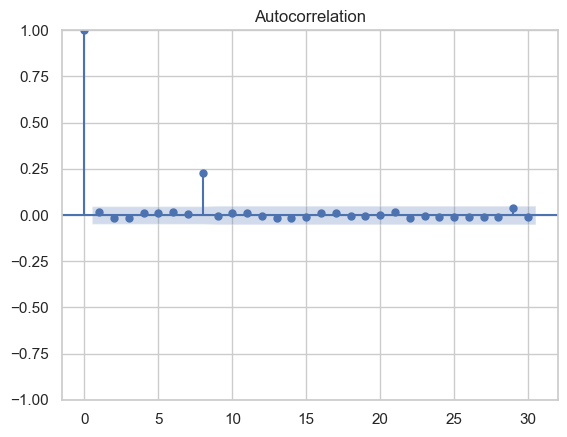

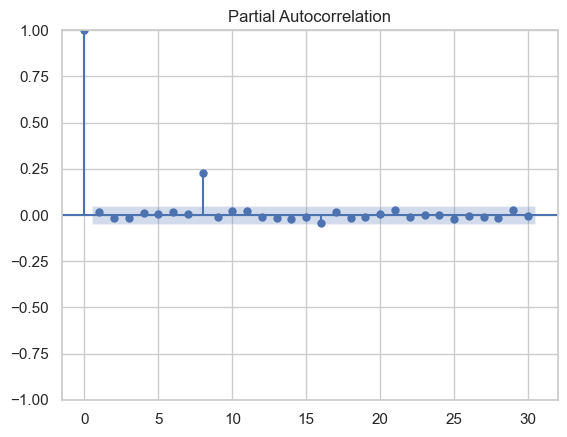

In [185]:
# Determine the order of the ARIMA model (p, d, q) based on ACF and PACF plots
# Plot ACF and PACF
plot_acf(data_sales, lags=30)
plot_pacf(data_sales, lags=30)
plt.show()

In [186]:
# Based on the plots, choose the order (p, d, q)
p, d, q = (9, 1, 9)  

# Build and train the ARIMA model
model = ARIMA(data, order=(p, d, q))
results = model.fit()

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

In [187]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              dff_sales   No. Observations:                 1380
Model:                 ARIMA(9, 1, 9)   Log Likelihood              -24242.134
Date:                Tue, 03 Oct 2023   AIC                          48522.267
Time:                        12:26:34   BIC                          48621.620
Sample:                             0   HQIC                         48559.436
                               - 1380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8485      0.592     -1.433      0.152      -2.009       0.312
ar.L2         -0.1081      0.330     -0.328      0.743      -0.755       0.539
ar.L3          0.0544      0.237      0.229      0.819      -0.410       0.519
ar.L4          0.0155      0.358      0.043      0.965      -0.686       0.717
ar.L5         -0.0787      0.386     -0.204      0.838      -0.834       0.677
ar.L6         -0.3373      0.279     -1.209      0.227      -0.884       0.209
ar.L7         -0.3084      0.324     -0.952      0.341      -0.943       0.326
ar.L8         -0.0135      0.341     -0.040      0.968      -0.681       0.654
ar.L9          0.1454      0.140      1.038      0.299      -0.129       0.420
ma.L1         -0.1107      0.596     -0.186      0.853      -1.279       1.058
ma.L2         -0.7727      0.623     -1.240      0.215      -1.994       0.449
ma.L3         -0.2146      0.368     -0.584      0.559      -0.935       0.506
ma.L4          0.0681      0.451      0.151      0.880      -0.815       0.951
ma.L5          0.1400      0.291      0.482      0.630      -0.430       0.710
ma.L6          0.2811      0.388      0.724      0.469      -0.480       1.042
ma.L7         -0.0346      0.401     -0.086      0.931      -0.820       0.751
ma.L8         -0.1051      0.301     -0.349      0.727      -0.696       0.485
ma.L9         -0.2404      0.354     -0.680      0.497      -0.934       0.453
sigma2      1.132e+14   3.89e-13   2.91e+26      0.000    1.13e+14    1.13e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1256137.87
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            10.33
Prob(H) (two-sided):                  0.00   Kurtosis:                       149.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.15e+41. Standard errors may be unstable.
"""

In [188]:
# make predictions on the eval data
ARIMA_pred=results.predict(start=len(data),
                      end=len(data)+len(eval)-1,
                      type = 'levels'
                      )

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [189]:
# evaluate our models
mse_ari= mean_squared_error(eval, ARIMA_pred)
msle_ari=mean_squared_log_error(eval, ARIMA_pred)
rmse_ari= np.sqrt(mean_squared_error(eval, ARIMA_pred)).round(2)
rmsle_ari= np.sqrt(mean_squared_log_error(eval, ARIMA_pred)).round(2)

results=pd.DataFrame([['ARIMA',mse_ari, msle_ari, rmse_ari, rmsle_ari]], columns= ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,ARIMA,1.228032e+14,0.015172,11081661.71,0.12


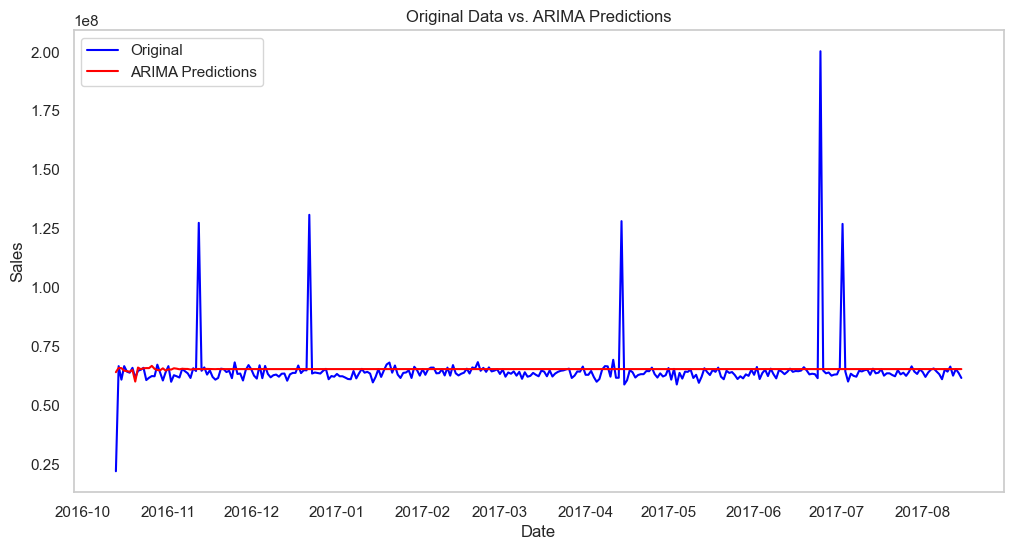

In [190]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the original data
plt.plot(eval.index, eval.values, label='Original', color='blue')

# Plot the ARIMA predictions
plt.plot(eval.index, ARIMA_pred, label='ARIMA Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data vs. ARIMA Predictions')
plt.legend()
plt.grid(False)

plt.show()

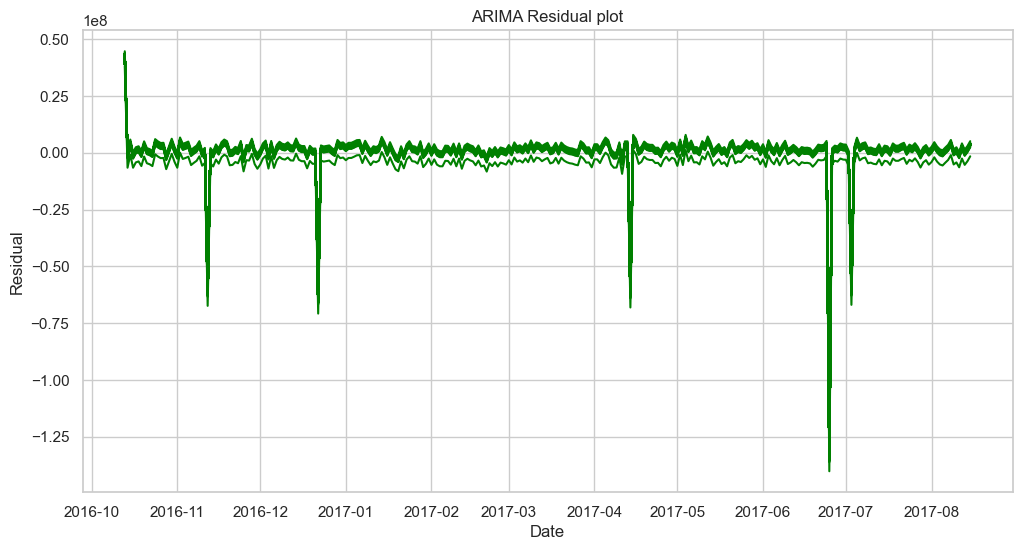

In [191]:
# plot the residual plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the residual data
plt.plot(eval.index, (ARIMA_pred.values - eval.values), label='residuals', color='green')

plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('ARIMA Residual plot')
plt.grid(True)
plt.show()

In [192]:
# Assuming you have already defined the evaluation results for each model
# Replace 'AR', 'ARIMA', 'SARIMA' with the actual model names
model_names = ['Random Forest', 'Decision Tree', 'AR', 'ARIMA', 'SARIMA']
mse_values = [mse_rf, mse_dt, mse_ar, mse_ari, mse_sar]
msle_values = [msle_rf,msle_dt , msle_ar, msle_ari, msle_sar]
rmse_values = [rmse_rf, rmse_dt, rmse_ar, rmse_ari, rmse_sar]
rmsle_values = [rmsle_rf, rmsle_dt, rmsle_ar, rmsle_ari, rmsle_sar]

results = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'MSLE': msle_values,
    'RMSE': rmse_values,
    'RMSLE': rmsle_values
})

# Print or use the 'results' DataFrame as needed
print(results)

           Model           MSE      MSLE          RMSE     RMSLE
0  Random Forest  2.366712e+06  0.000314  2.083086e+00  0.017717
1  Decision Tree  4.932480e+06  0.000314  2.160993e+00  0.027136
2             AR  1.227554e+14  0.015058  1.107951e+07  0.120000
3          ARIMA  1.228032e+14  0.015172  1.108166e+07  0.120000
4         SARIMA  1.797443e+14  0.028543  1.340688e+07  0.170000


In [193]:
# Make predictions on the test data
test_predictions = rf.predict(encoded_test)
test_predictions

array([89429.4292827 , 89244.15235   , 87966.44765005, ...,
       90903.81161   , 89009.85076999, 89362.42151016])

In [196]:
import joblib


In [197]:
#'dt' is my trained decision tree model
rf_model_filename = 'sales_rf_model.joblib'

# Save the model to a file using pickle
with open(rf_model_filename, 'wb') as model_file:
    joblib.dump(rf, model_file)

In [198]:
 # Load the model from the saved file
with open(rf_model_filename, 'rb') as model_file:
    loaded_sales_model = pickle.load(model_file)

# Now we can use loaded_sales_model for predictions and evaluation

In [199]:
# Load sample submission
sample_submission = pd.read_excel(r'C:/Users/manca/Downloads/sample_submission (1).xlsx')
sample_submission.head()

,id,sales
0,3000888,0
1,3000889,0
2,3000890,0
3,3000891,0
4,3000892,0


In [200]:
# Convert the test prediction array to a DataFrame with a column name 'Prediction'
df_prediction = pd.DataFrame({'Prediction': test_predictions})

In [201]:
df_prediction.head()

,Prediction
0,89429.429283
1,89244.152350
2,87966.447650
3,90977.997660
4,89270.086160


In [202]:
submission_df = pd.concat([sample_submission, df_prediction], axis=1)
submission_df.head()

,id,sales,Prediction
0,3000888,0,89429.429283
1,3000889,0,89244.152350
2,3000890,0,87966.447650
3,3000891,0,90977.997660
4,3000892,0,89270.086160


In [203]:
submission_df.drop('sales', axis=1, inplace=True)

In [204]:
submission_df.head()

,id,Prediction
0,3000888,89429.429283
1,3000889,89244.152350
2,3000890,87966.447650
3,3000891,90977.997660
4,3000892,89270.086160


In [205]:
# rename prediction to sales
submission_df.rename(columns={'Prediction':'sales'}, inplace=True)
submission_df.head(20)

,id,sales
0,3000888,89429.429283
1,3000889,89244.152350
2,3000890,87966.447650
3,3000891,90977.997660
4,3000892,89270.086160
5,3000893,89319.048600
6,3000894,88929.830220
7,3000895,89889.309550
8,3000896,89939.823436
9,3000897,89069.609660


In [206]:
# define the components to be exported 
components= {
    'models': rf


}

In [207]:
# create a directory named "export"
!mkdir export

A subdirectory or file export already exists.


In [208]:
# create a path to the "export" directory
destination= os.path.join(".","export")

In [210]:
# save the components object as a pickled file 
with open(os.path.join(destination, "ml.joblib"), "wb") as f:
    joblib.dump(components, f)

In [ ]:
# save the list of installed Python packages along with their versions into a text file
!pip freeze > export/requirements.text